# **Project Name**    -  Netflix Movies and Tvshows clustering



##### **Project Type**    - Unsupervised Machine learning
##### **Contribution**    - Individual

# **Project Summary -**

The aim of this project is to analyze the Netflix dataset of movies and Tv shows until 2019, sourced from the third-party search engine flixable. The goal is to group the content into relevant clusters using NLP techniques to improve the user experiance through the recommendation system. This will help to prevent subscriber churn for Netflix, which currently has over 277 million subscibers.

**The project followed a step-by-step process:**

1. Handling null values in dataset.
2. Managing nested columns.
3. Binning the rating aatributes into the categories.
4. Performing Exploratory data analysis to gain insight for preventing subscribers churn.
5. Creating clusters using attributes like director, cast, country, rating and description. These attributes were tokenized, preprocessed and text vectorized using tf-idf vectorizer.
6. Reducing the dimensionality of the datset using PCA to improve performance.
7. Employing K-means clustering , hierarchical clustering and Agglomerative Hierarchical clustering algorithm, the determine optimal cluster numbers through various evalution methods.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, you are required to do

1. Exploratory Data Analysis

2. Understanding what type content is available in different countries.

3. If Netflix has been increasingly focusing on TV rather than movies in recent years.

4. Clustering similar content by matching text-based features

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score,accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import plotly.graph_objects as go


import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [18,7]
sns.set(rc={'figure.figsize':(18,7)})

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# Last 5 rows of dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

Their are 7787 rows and 12 columns present in my dataset.

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

There are not any duplicated value present in my dataset.

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


<Axes: >

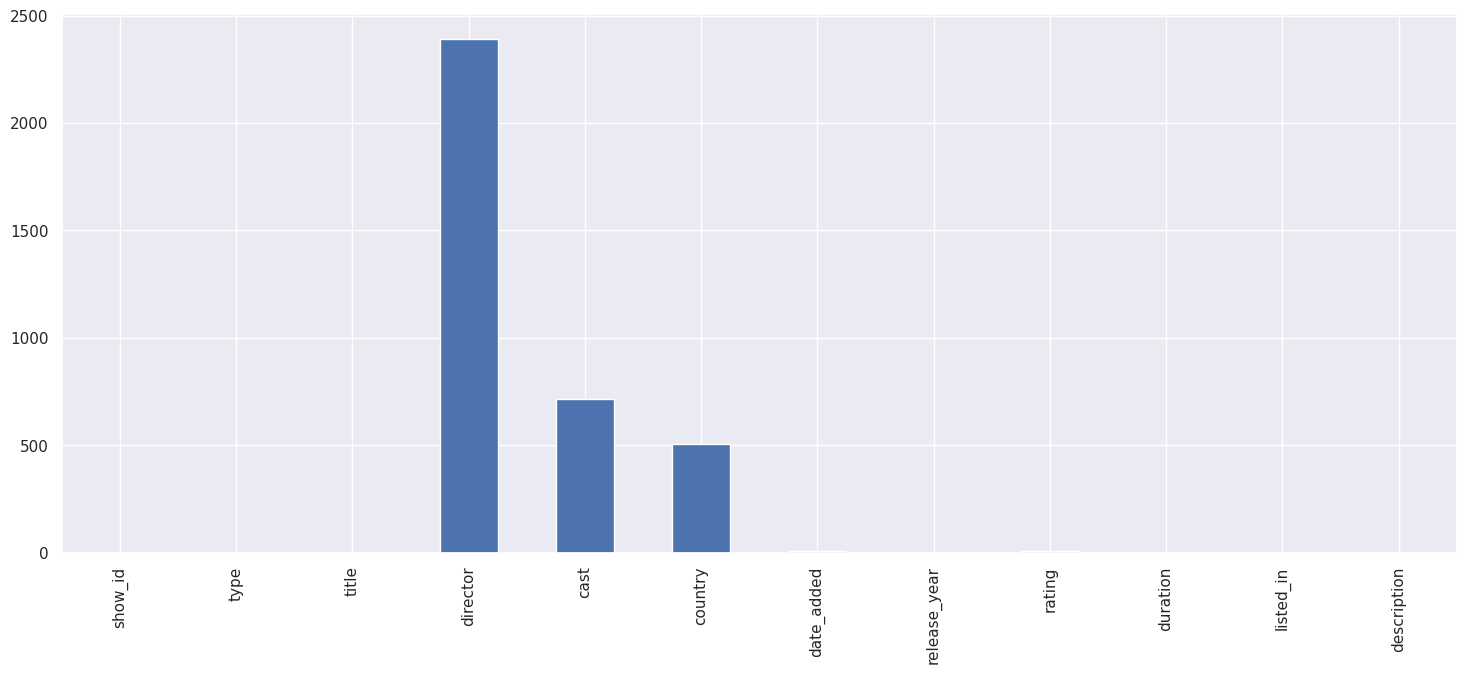

In [9]:
# Visualizing the missing values
df.isnull().sum().plot(kind='bar')

### What did you know about your dataset?

Answer Here

In my dataset their are some null values present in some columns.

In director column their are 2389 null values.

In cast column their are 718 null values.

In Country column their are 507 null values.

In date_added their are 10 null values present and also in rating their are 7 null values present.

Not any duplicate value present in my dataset.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

Answer Here

Here is the brief description of variables:

**1. show_id:** A unique identifier for each show or movie in the Netflix catalog. This column helps to distinguish between different entries.

**2. Type:** Specifies whether the entry is a "Movie" or a "TV Show." This allows you to differentiate between feature films and episodic content.

**3. title:** The name of the show or movie. This is the title that viewers see when browsing through Netflix.

**4. director:** The name(s) of the director(s) of the show or movie. This column may be empty if no director is specified.

**5. cast:** A list of main actors and actresses featured in the show or movie. This gives information about the leading performers.

**6. country:** The country or countries where the show or movie was produced. This can help identify the origin of the content.

**7. date_added:**  The date when the show or movie was added to the Netflix catalog. This can be used to track new releases or when content became available.

**8. release_year:** The year the show or movie was originally released. This gives context on when the content was created or first premiered.

**9. rating:**  The content rating (e.g., PG, R, TV-MA) that indicates the appropriate audience for the show or movie. This is useful for understanding the age-appropriateness of the content.

**10. duration:** The length of the movie (in minutes) or the number of seasons for a TV show. This provides information on how long the content is.

**11. listed_in:** The genres or categories the show or movie belongs to (e.g., "Comedies," "Dramas," "Action & Adventure"). This helps in understanding the type of content.

**12. description:**  A brief summary or synopsis of the show or movie. This helps viewers quickly understand the plot or theme of the content.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
# Calculate the number of missing values in each column
missing_values_count = df.isnull().sum()

# Calculate the percentage of missing values for each column
total_entries = len(df)
missing_percentage = (missing_values_count / total_entries) * 100

# Combine the results into a DataFrame for better visualization
missing_data = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Percentage of Missing Values (%)': missing_percentage
})

# Display the missing data information
missing_data

,Missing Values Count,Percentage of Missing Values (%)
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,2389,30.679337
cast,718,9.220496
country,507,6.510851
date_added,10,0.128419
release_year,0,0.000000
rating,7,0.089893
duration,0,0.000000


In [14]:
# Total value count in date_added column
df["date_added"].value_counts()

,count
date_added,
"January 1, 2020",118
"November 1, 2019",94
"December 31, 2019",76
"March 1, 2018",76
"October 1, 2018",72
...,...
"October 12, 2014",1
"March 22, 2020",1
"March 31, 2013",1


In [15]:
# Total value count in rating column
df["rating"].value_counts()

,count
rating,
TV-MA,2863
TV-14,1931
TV-PG,806
R,665
PG-13,386
TV-Y,280
TV-Y7,271
PG,247
TV-G,194


In [16]:
# Total value count in country column
df["country"].value_counts()

,count
country,
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183
...,...
"Russia, United States, China",1
"Italy, Switzerland, France, Germany",1
"United States, United Kingdom, Canada",1


In [17]:
# Total value count in director column
df["director"].value_counts()

,count
director,
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Youssef Chahine,12
...,...
Vibhu Virender Puri,1
Lucien Jean-Baptiste,1
Jason Krawczyk,1




1.   Since 'date_added' and 'rating' has very less percentage of null count so
     we can drop those observations to avoid any biasness in our clustering model.
2.   We cannot drop or impute any values in 'director' and 'cast' as the null
     percentage is comparatevely high and we do not know data of those actual movies/Tv shows, so its better to replace those entries with 'unknown'.
3.   We can fill null values of 'country' with mode as we only have 6% null
     values and most of the movies/shows are from US only.



In [18]:
# Imputing null value as per our discussion
# Imputing with unknown in null values of director and cast feature
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

# Imputing null values of country with mode
df['country'] = df['country'].fillna(df['country'].mode()[0])

# Dropping null values of date_added and rating
df.dropna(axis=0, inplace=True)

In [19]:
# Rechecking the missing values/null values count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(df.isnull().sum())
print("-"*50)

# Rechecking the percentage of null values in each category
print("Percentage of null value count in each of the variable: ")
print("-"*50)
null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
--------------------------------------------------
Percentage of null value count in each of the variable: 
--------------------------------------------------
show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64%
--------------------------------------------------


In [20]:
# Let's create a copy of dataframe and unnest the original one
df_new = df.copy()

In [21]:
# unnesting 'Director' column
dir_constraint=df['director'].apply(lambda x: str(x).split(',')).tolist()
df1 = pd.DataFrame(dir_constraint, index = df['title'])
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'Director'},inplace=True)
df1 = df1.drop(['level_1'],axis=1)
df1.sample(10)

,title,Director
6517,Teen Mom 2,Unknown
1279,"Can't Cope, Won't Cope",Unknown
3236,Indiana Jones and the Kingdom of the Crystal S...,Steven Spielberg
972,Big Time,Kaspar Astrup Schröder
6155,Snowpiercer,Bong Joon Ho
2412,Forces of Nature,Unknown
6400,Super Monsters: The New Class,Steve Ball
633,"As Above, So Below",John Erick Dowdle
316,Accident,Cheang Pou Soi
829,Bazaar,Sagar Sarhadi


In [22]:
# unnesting 'Cast' column
cast_constraint=df['cast'].apply(lambda x: str(x).split(',')).tolist()
df2 = pd.DataFrame(cast_constraint, index = df['title'])
df2 = df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Actors'},inplace=True)
df2 = df2.drop(['level_1'],axis=1)
df2.sample(10)

,title,Actors
24585,Kitten Rescuers,Jo Brand
41111,Space Racers,Melissa Hutchison
37015,Restless Creature: Wendy Whelan,Peter Martins
51071,There Will Be Blood,Russell Harvard
16224,For the Love of Benji,Bridget Armstrong
420,100 Years: One Woman's Fight for Justice,Unknown
28460,Marvel's Daredevil,Deborah Ann Woll
14737,Enemy,Tim Post
24061,KENGAN ASHURA,Yumi Uchiyama
32385,Northern Rescue,William Baldwin


In [23]:
# unnesting 'Listed_in' column
listed_constraint=df['listed_in'].apply(lambda x: str(x).split(',')).tolist()
df3 = pd.DataFrame(listed_constraint, index = df['title'])
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Genre'},inplace=True)
df3 = df3.drop(['level_1'],axis=1)
df3.sample(10)

,title,Genre
13421,The Bling Lagosians,Dramas
16997,Zindagi Na Milegi Dobara,Comedies
7509,Krish Trish and Baltiboy,Children & Family Movies
15355,The World We Make,Dramas
15534,Time: The Kalief Browder Story,Docuseries
9378,Muran,Action & Adventure
16420,"We, the Marines",International Movies
11059,Radical: the Controversial Saga of Dada Figuei...,Documentaries
10256,Organize Isler,Comedies
14820,The Prince of Tennis ~ Match! Tennis Juniors ~,International TV Shows


In [24]:
# unnesting 'Country' column
Country_constraint=df['country'].apply(lambda x: str(x).split(',')).tolist()
df4 = pd.DataFrame(Country_constraint, index = df['title'])
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'Country'},inplace=True)
df4 = df4.drop(['level_1'],axis=1)
df4.sample(10)

,title,Country
5212,My Little Pony Equestria Girls: Rainbow Rocks,United States
4452,Little Singham: Mahabali,United States
6835,Sling Blade,United States
1993,Dawn of the Croods,United States
3408,Hope Springs Eternal,United States
8482,The Theory of Everything,Japan
7709,The First Line,United States
8675,Tig,United States
958,Beats,United States
5517,Offering to the Storm,Spain


In [25]:
# Merging all the unnested dataframe
# Merging director and cast
df5 = df2.merge(df1,on=['title'],how='inner')

#Merging listed_in with merged of (director and cast)
df6 = df5.merge(df3,on=['title'],how='inner')

#Merging country with merged of [Listed_in with merged of (director and cast)]
df7 = df6.merge(df4,on=['title'],how='inner')

#Final dataframe
df7.head()

,title,Actors,Director,Genre,Country
0,3%,João Miguel,Unknown,International TV Shows,Brazil
1,3%,João Miguel,Unknown,TV Dramas,Brazil
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil


Now let's merge this dataframe with the original one on the left join to avoid information loss.

In [26]:
# Merging unnested data with the created dataframe in order to make the final dataframe
df = df7.merge(df[['type','title','date_added','release_year', 'rating', 'duration', 'description']],on=['title'],how='left')
df.head()

,title,Actors,Director,Genre,Country,type,date_added,release_year,rating,duration,description
0,3%,João Miguel,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
1,3%,João Miguel,Unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...


In [27]:
# checking info of dataset before typecasting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175863 entries, 0 to 175862
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175863 non-null  object
 1   Actors        175863 non-null  object
 2   Director      175863 non-null  object
 3   Genre         175863 non-null  object
 4   Country       175863 non-null  object
 5   type          175863 non-null  object
 6   date_added    175863 non-null  object
 7   release_year  175863 non-null  int64 
 8   rating        175863 non-null  object
 9   duration      175863 non-null  object
 10  description   175863 non-null  object
dtypes: int64(1), object(10)
memory usage: 14.8+ MB


In [28]:
# Ensure that only strings are processed with the split method
df['duration'] = df['duration'].apply(lambda x: int(str(x).split()[0]) if isinstance(x, str) else x)

# Strip any leading or trailing whitespace from the date_added column
df['date_added'] = df['date_added'].str.strip()

# Typecasting string object to datetime object of date_added column
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y")

# Extracting date, day, month, and year from date_added column
df['day_added'] = df['date_added'].dt.day
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

# Dropping date_added
df.drop('date_added', axis=1, inplace=True)



In [29]:
# checking info of datset after typecasting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175863 entries, 0 to 175862
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175863 non-null  object
 1   Actors        175863 non-null  object
 2   Director      175863 non-null  object
 3   Genre         175863 non-null  object
 4   Country       175863 non-null  object
 5   type          175863 non-null  object
 6   release_year  175863 non-null  int64 
 7   rating        175863 non-null  object
 8   duration      175863 non-null  int64 
 9   description   175863 non-null  object
 10  day_added     175863 non-null  int32 
 11  month_added   175863 non-null  int32 
 12  year_added    175863 non-null  int32 
dtypes: int32(3), int64(2), object(8)
memory usage: 15.4+ MB


**Let's binning rating and create bins as following:**


*   **Adult content :** TV-MA, NC-17,R
*   **Children content :** TV-PG, PG, TV-G, G


*   **Teen content :** PG-13, TV-14
*   **Family-friendly-content :** TV-Y, TV-Y7, TV-Y7-FV

*   **Not Rated :** NR, UR








In [30]:
# Binning the values in the rating coulms
rating_map = {'TV-MA': 'Adult content',
              'R' : 'Adult content',
              'PG-13' : 'Teen content',
              'TV-14' : 'Teen content',
              'TV-PG' : 'children content',
              'NR' : 'Not Rated',
              'TV-G' : 'Children content',
              'TV-Y' : 'Family-friendly content',
              'TV-Y7' : 'Family-friendly-content',
              'PG' : 'Children content',
              'G' : 'Children content',
              'NC-17' : 'Adult content',
              'TV-Y7-FV' : 'Family-friendly content',
              'UR': 'Not Rated'}

df['rating'].replace(rating_map, inplace=True)
df['rating'].unique()



array(['Adult content', 'Teen content', 'children content', 'Not Rated',
       'Children content', 'Family-friendly content',
       'Family-friendly-content'], dtype=object)

In [31]:
# Checking head after binning
df.head()

,title,Actors,Director,Genre,Country,type,release_year,rating,duration,description,day_added,month_added,year_added
0,3%,João Miguel,Unknown,International TV Shows,Brazil,TV Show,2020,Adult content,4,In a future where the elite inhabit an island ...,14,8,2020
1,3%,João Miguel,Unknown,TV Dramas,Brazil,TV Show,2020,Adult content,4,In a future where the elite inhabit an island ...,14,8,2020
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,2020,Adult content,4,In a future where the elite inhabit an island ...,14,8,2020
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil,TV Show,2020,Adult content,4,In a future where the elite inhabit an island ...,14,8,2020
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil,TV Show,2020,Adult content,4,In a future where the elite inhabit an island ...,14,8,2020


In [32]:
# Spearating the dataframes for further analysis
df_movies = df[df['type']=='Movie']
df_tvshows = df[df['type']=='TV Show']

# Printing the shape
print(df_movies.shape,df_tvshows.shape)

(126135, 13) (49728, 13)


### What all manipulations have you done and insights you found?

**We have divided data wrangling into five different sections :**

1. In this section we have imputed/drop null values of:
   

*   Imputed 'director' and 'cast' with 'Unknown'.
*   Imputed 'country' with 'mode'.


*   Drop null values of 'date_added' and 'rating' columns.

2. We have unnested values from following features:


*   'director'

*   'cast'
*   listed_in'


*   'country'

We have unnested the values and stored in different dataframes and then merged all the dataframes with the original one using left join in order to get the isolated values of each of the features.

3. We have typecasted the following features:


*   'duration' into integer (removing min and seasons from the values).
*   'date_added' to datetime.

4. We have seen that the 'rating' columns contains various coded categories, so we have decided to create bins and distributes the values accordingly:

* **Adult content :** TV-MA, NC-17

* **Children content :** TV-PG, PG, TV-G, G

* **Teen content :** PG-13, TV-14

* **Family-friendly-content :** TV-Y, TV-Y7, TV-Y7-FV

* **Not Rated :** NR, UR

5. Lastly we have splitted the datframe into two df one is df_movies that contains only movies and second is df_tv_shows that contains only Tv shows for our further analysis.









## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : The relative percentage of total number of Movies and Tv shows over netflix

In [33]:
# Chart - 1 visualization code

# Calculate values for the pie chart
labels = ['Movies', 'TV Shows']
values = [df['type'].value_counts()[0], df['type'].value_counts()[1]]

# Colors for the pie chart
colors = ['#ffd700', '#008000']

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

# Customize layout
fig.update_layout(
    title_text='Percentage of Movies and TV Shows',
    title_x=0.5,
    width=700,
    height=700,
    legend=dict(x=0.9),
    annotations=[dict(text='Type of content', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Update traces with custom colors
fig.update_traces(marker=dict(colors=colors))

# Show the plot
fig.show()


##### 1. Why did you pick the specific chart?

Answer Here.  
This graphs shows the percentage of Tv shows and movies data present on Netflix Data set.

##### 2. What is/are the insight(s) found from the chart?

Answer Here



1.   We can easily see that majority of content on netflix is Movies , which
     account for around two-third of total content. Tv shows make up the remaining one-third of the content.
2.   We can conclude that in the given data set only 28.3% are Tv shows and 71.7% are Movies.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here



1.   Yes! the production house should more focus on quality Movies because their
     is high competition in the market.
2.   Tv shows are less in numbers hence good opportunity for business.



#### Chart - 2 : How content is distributed over Netflix?

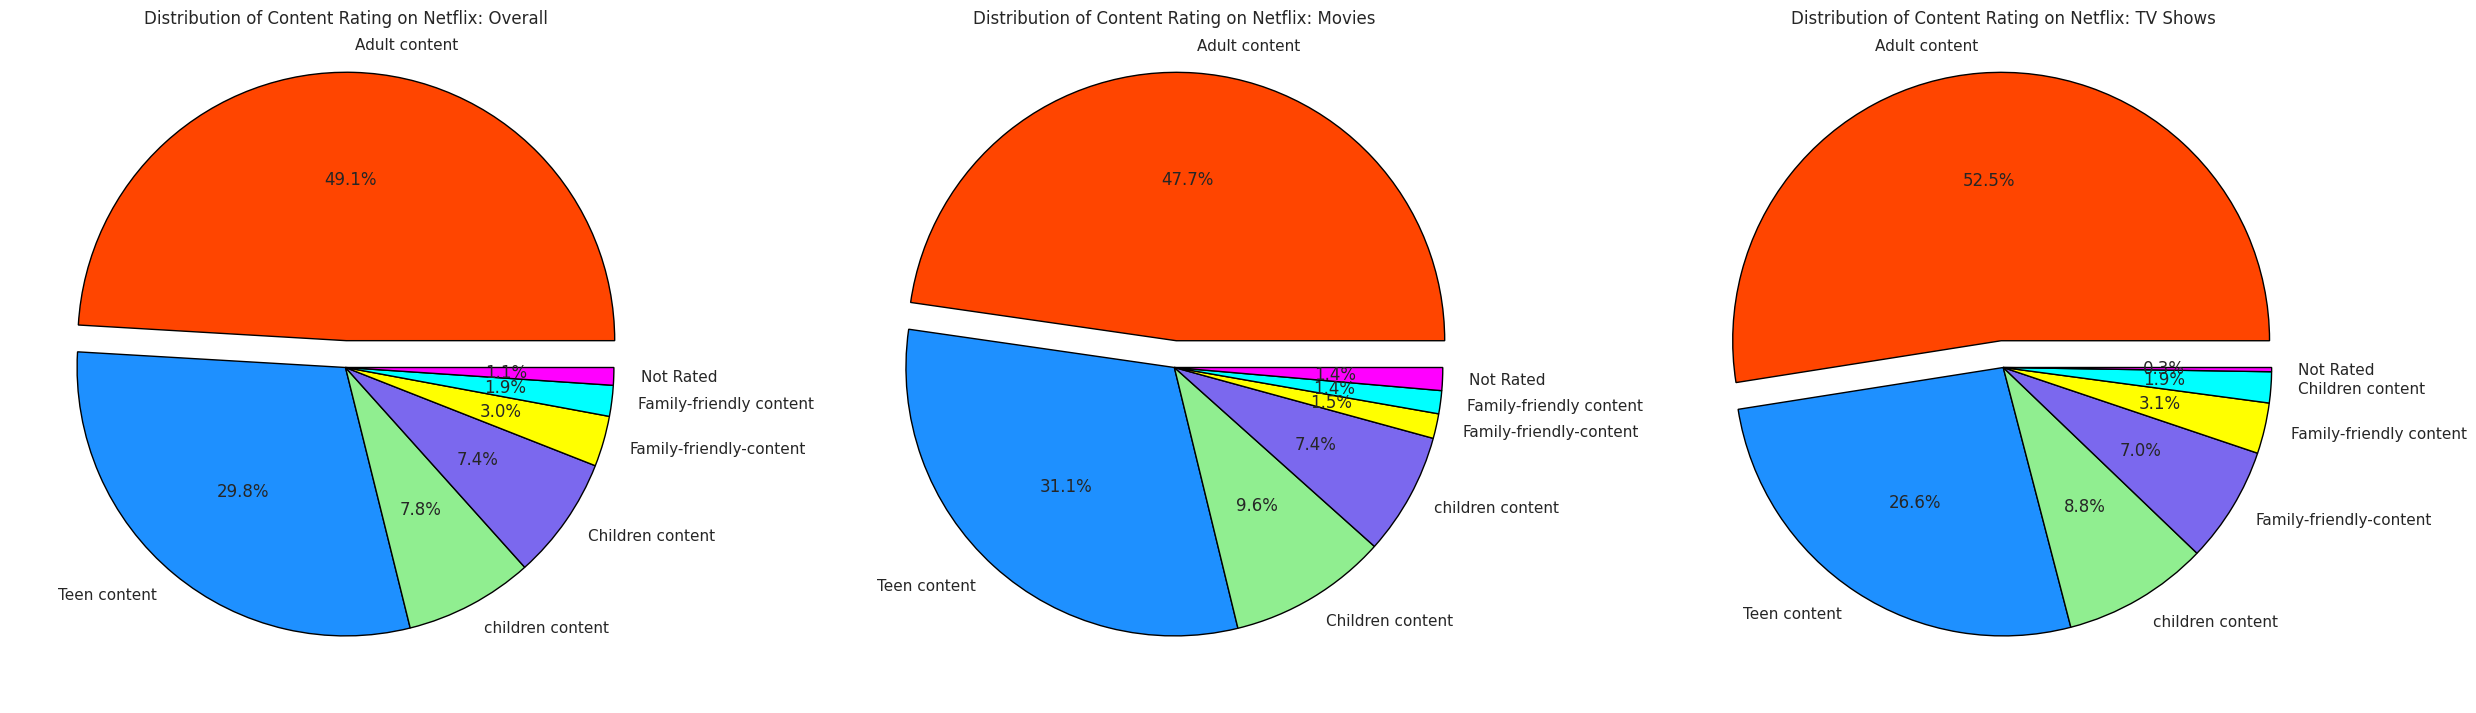

In [34]:
# Chart - 2 visualization code
# Splitting DataFrame into Movies and TV Shows
df_movies = df[df['type'] == 'Movie']
df_tvshows = df[df['type'] == 'TV Show']

# Plotting
plt.figure(figsize=(25, 10))

for i, j, k in ((df, 'Overall', 0), (df_movies, 'Movies', 1), (df_tvshows, 'TV Shows', 2)):
    plt.subplot(1, 3, k + 1)
    count = i['rating'].value_counts()

    # Dynamically set explode based on the number of labels
    explode = [0.1 if label == count.index[0] else 0 for label in count.index]

    # Dynamically generate colors for the pie chart based on the number of categories
    color_palette = ['orangered', 'dodgerblue', 'lightgreen', 'mediumslateblue', 'yellow', 'cyan', 'magenta']
    colors = color_palette[:len(count.index)]  # Ensure the number of colors matches the number of labels

    # Plotting the pie chart
    plt.pie(count,
            labels=count.index,
            explode=explode,
            colors=colors,
            autopct='%1.1f%%',
            labeldistance=1.1,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})

    # Set the title for each subplot
    plt.title(f"Distribution of Content Rating on Netflix: {j}")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We choose this chart to know the percentage of type of content present on Netflix.

##### 2. What is/are the insight(s) found from the chart?

1. We found that most of the content present on Netflix belongs to adult content and teen categories.
2. Another important insight we see that family friendly content is less in movies campared to Tv shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. For high gain production house should more focus on teen and adult content.
2. There is good chances of growth in Family friendly content in Tv shows.

#### Chart - 3 : Who are the top actors performing in Movies and Tv shows

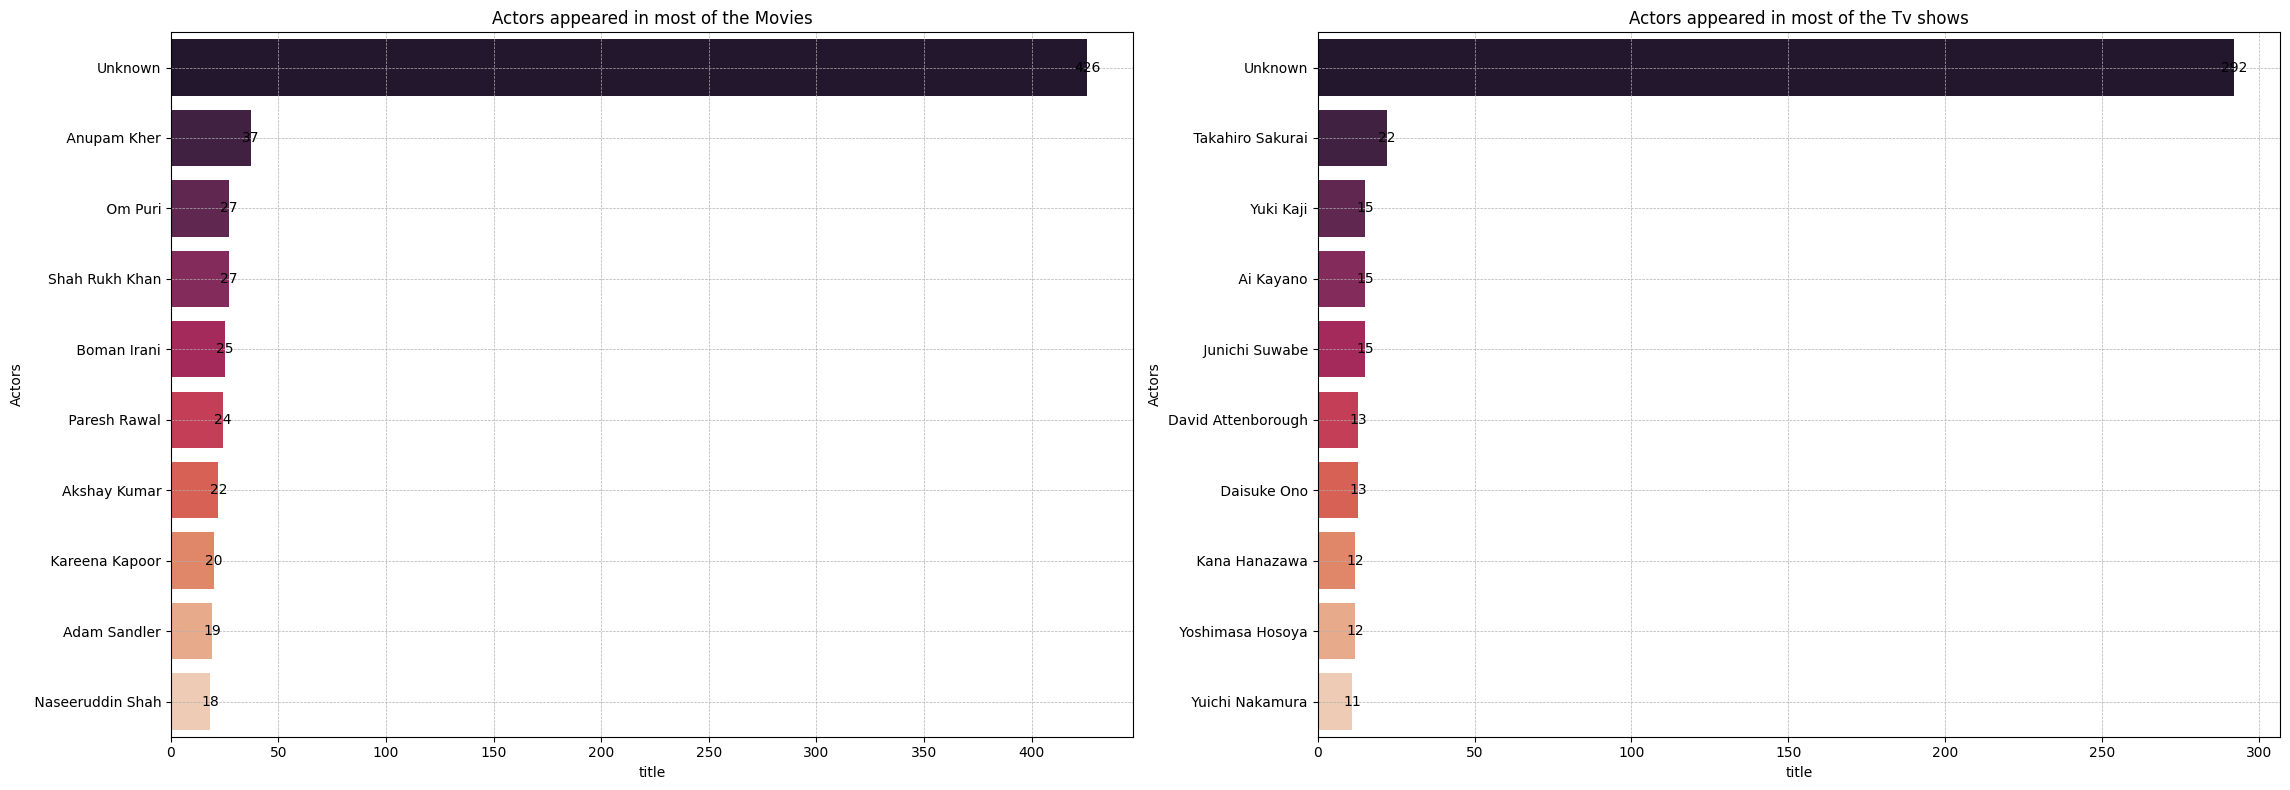

In [35]:
# Chart - 3 visualization code
# Ensure the style is set to default and figure size is defined
plt.style.use('default')
plt.figure(figsize=(23, 8))

# Iterate through Movies and TV Shows dataframes for visualization
for i, j, k in ((df_movies, 'Movies', 0), (df_tvshows, 'Tv shows', 1)):
    plt.subplot(1, 2, k + 1)

    # Group by 'Actors' and count unique 'title' entries to find the top actors
    df_actor = i.groupby(['Actors']).agg({'title': 'nunique'}).reset_index().sort_values(by=['title'], ascending=False).head(10)

    # Plotting the bar chart
    plots = sns.barplot(y="Actors", x="title", data=df_actor, palette="rocket")
    plt.title(f'Actors appeared in most of the {j}')
    plt.grid(linestyle='--', linewidth=0.5)

    # Adding labels to bars manually
    for bar in plots.patches:
        plt.text(
            bar.get_width() + 0.1,  # X-coordinate for the label
            bar.get_y() + bar.get_height() / 2,  # Y-coordinate for the label
            f'{bar.get_width():.0f}',  # Label text
            ha='center', va='center'
        )

# Show the final plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To know which actor is more popular on Netflix. Because bar chart is very good choice to do camparision in different categories.

##### 2. What is/are the insight(s) found from the chart?

1. We found that most of popular actors belongs to INDIA.
2. No popular actors in Tv shows from INDIA.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Indains are movie lover, they love to watch movies hence business should target indain audience for movies.

#### Chart - 4 : who are the top directors directing Movies and Tv shows

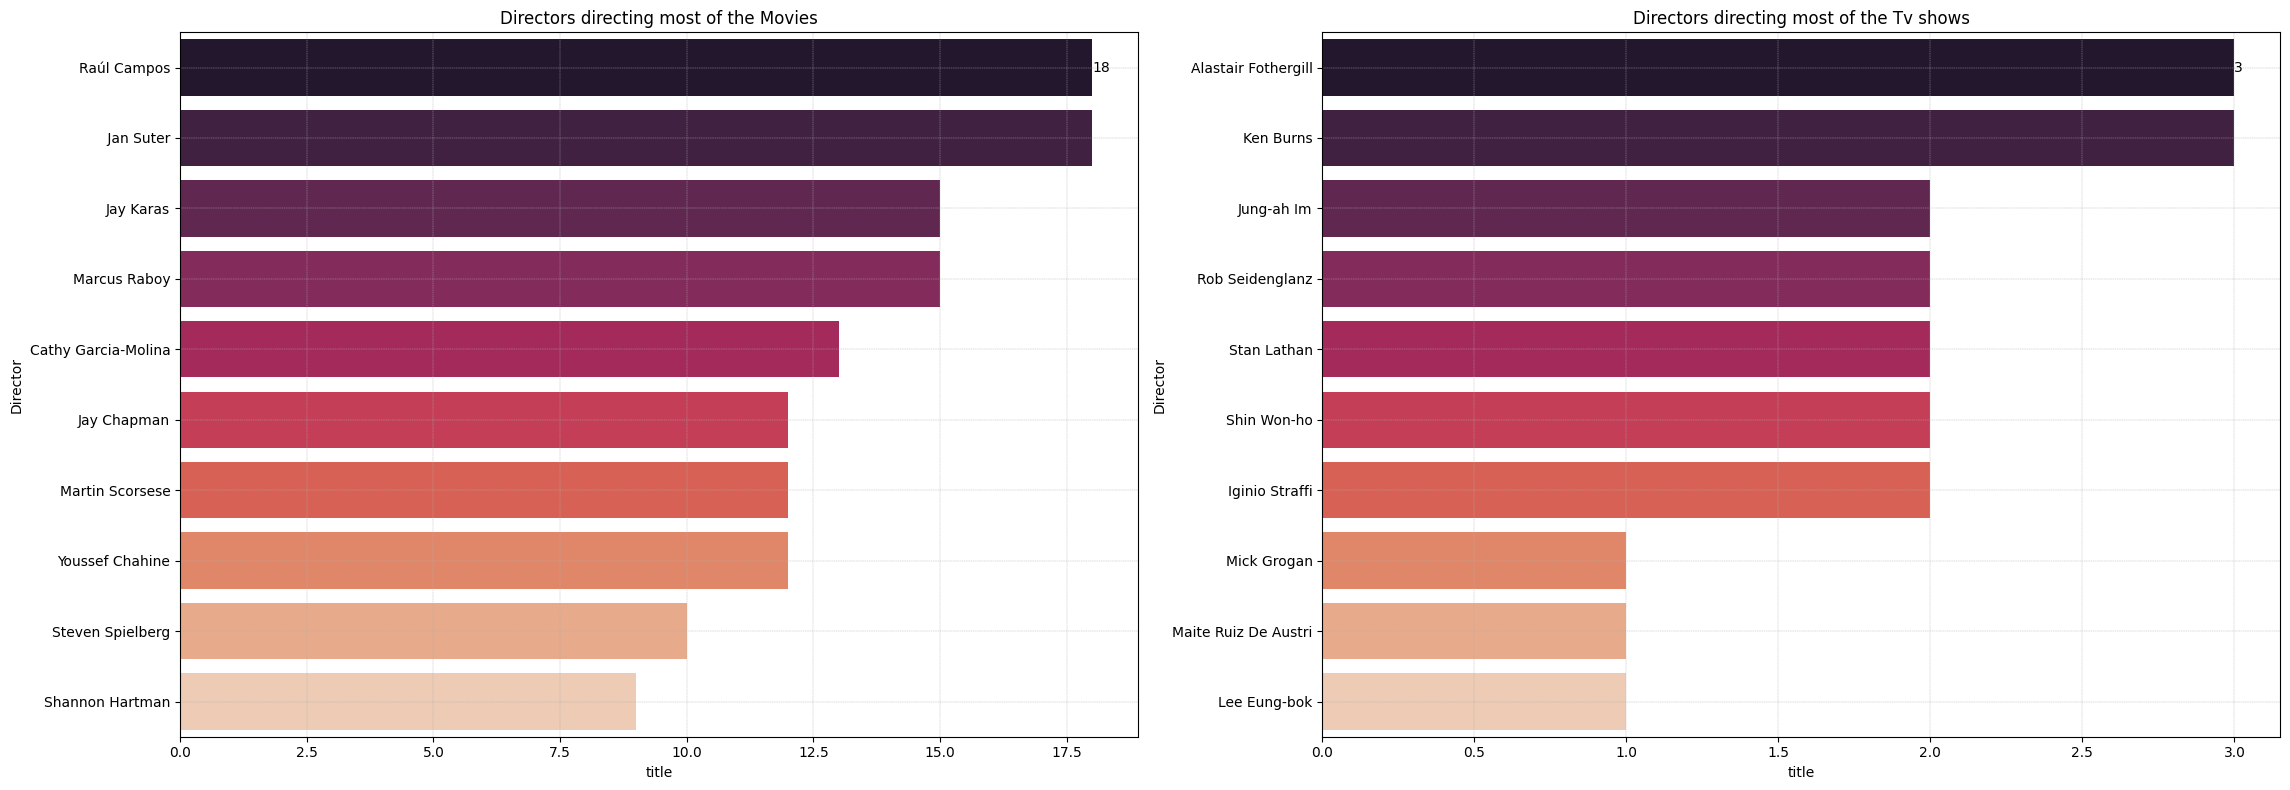

In [36]:
# Remove entries with NaN or "Unknown" in 'Director' column for both Movies and TV Shows
df_movies_filtered = df_movies.dropna(subset=['Director'])
df_tvshows_filtered = df_tvshows.dropna(subset=['Director'])

# Optional: Filter out specific unwanted values like 'Unknown'
df_movies_filtered = df_movies_filtered[df_movies_filtered['Director'].str.lower() != 'unknown']
df_tvshows_filtered = df_tvshows_filtered[df_tvshows_filtered['Director'].str.lower() != 'unknown']

# Set up the plot
plt.figure(figsize=(23, 8))

# Iterate through Movies and TV Shows dataframes for visualization
for i, j, k in ((df_movies_filtered, 'Movies', 0), (df_tvshows_filtered, 'Tv shows', 1)):
    plt.subplot(1, 2, k + 1)
    # Group by Director and count unique titles, then sort and take top 10
    df_director = (
        i.groupby(['Director'])
        .agg({'title': 'nunique'})
        .reset_index()
        .sort_values(by=['title'], ascending=False)
        .head(10)
    )

    # Plotting the bar plot
    plots = sns.barplot(y="Director", x="title", data=df_director, palette="rocket")
    plt.title(f'Directors directing most of the {j}')
    plt.grid(linestyle='--', linewidth=0.3)
    plots.bar_label(plots.containers[0])

plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

To know about which director is most popular to directing movies and tv shows on Netflix.

##### 2. What is/are the insight(s) found from the chart?

1. We found most of the movies directed by Jan suter.
2. Most of tv shows directed by Ken burns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Movies/Tvshows producers cans select the popular director for their upcoming projects.

#### Chart - 5 : What are the top 10 Countries involved in content creation

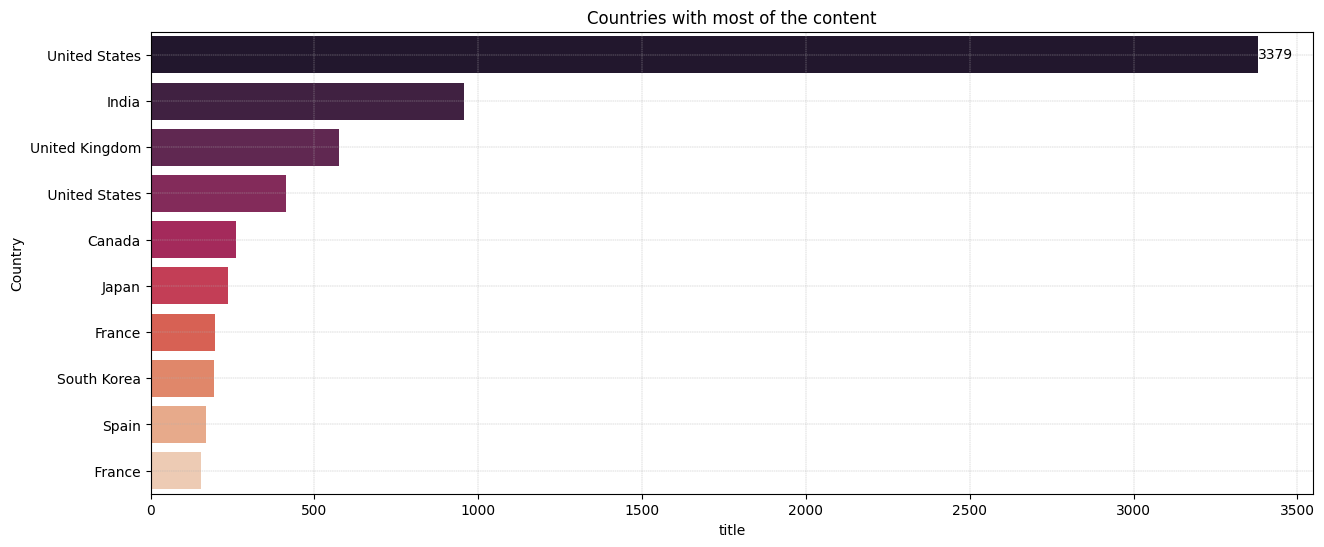

In [37]:
# Chart - 5 visualization code
df_country = df.groupby(['Country']).agg({'title': 'nunique'}).reset_index().sort_values(by=['title'], ascending=False).head(10)
plt.figure(figsize=(15, 6))
plots = sns.barplot(y="Country", x="title", data=df_country, palette="rocket")
plt.title(f'Countries with most of the content')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To know which country makes maximum number of Tvshows and Movies.

##### 2. What is/are the insight(s) found from the chart?

1. The United States is the top country producing both movies and tv shows on Netflix.
2. India is the second highest country to produces movies and tvshows on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained can have a positive impact on Netflix's business by highlighting opportunities for growth and expansion, such as investing in Amarican and Bollywood content and acquiring more diverse content.

#### Chart - 6 : Which country has the highest spread of Movies and Tv shows over Netflix

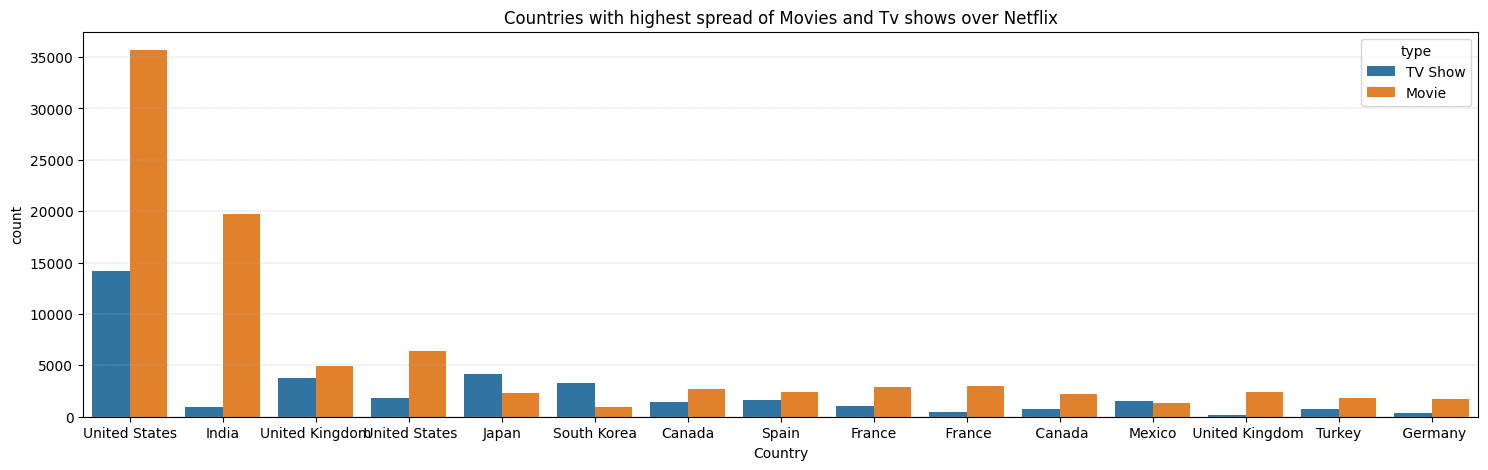

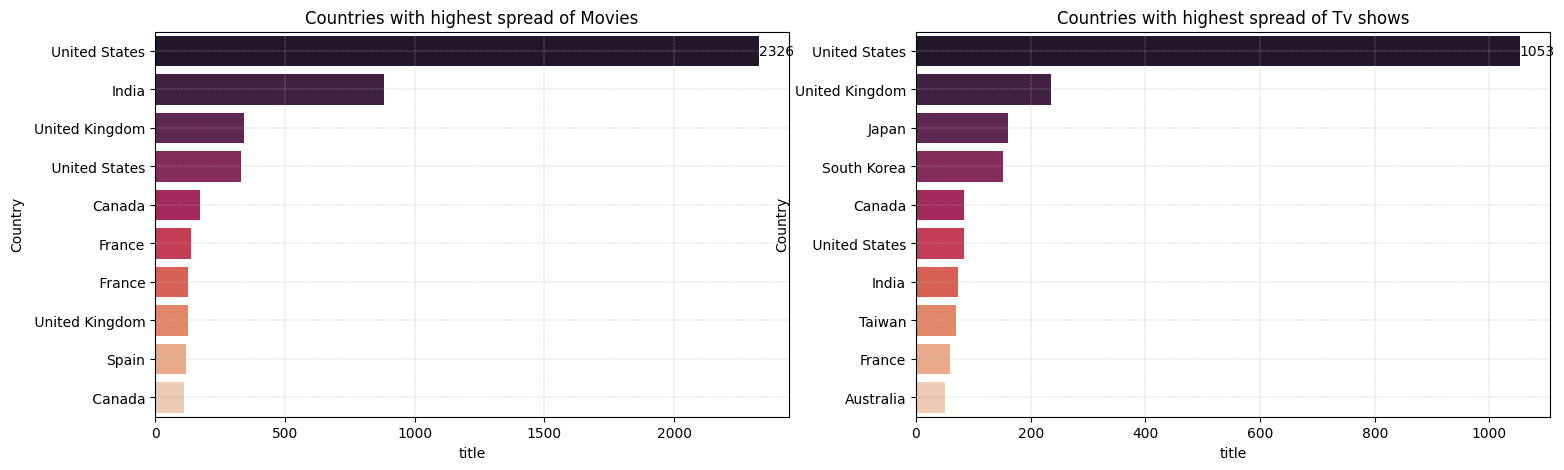

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(18,5))
plt.grid(linestyle='--', linewidth=0.3)
sns.countplot(x=df['Country'], order=df['Country'].value_counts().index[0:15],hue=df['type'])
plt.title('Countries with highest spread of Movies and Tv shows over Netflix')
plt.show()

plt.figure(figsize=(18,5))
for i,j,k in ((df_movies, 'Movies', 0), (df_tvshows, 'Tv shows', 1)):
    plt.subplot(1,2,k+1)
    df_country = i.groupby(['Country']).agg({'title': 'nunique'}).reset_index().sort_values(by=['title'], ascending=False).head(10)
    plots = sns.barplot(y="Country", x="title", data=df_country, palette="rocket")
    plt.title(f'Countries with highest spread of {j}')
    plt.grid(linestyle='--', linewidth=0.3)
    plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To know the which country produces which type of content the most.

##### 2. What is/are the insight(s) found from the chart?

1. India produces most amount of movies in compare to Tv shows.
2. Japan and South Korea produces more Tv shows in compare to movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained can have a positive impact on Netflix's business by highlighting opportunities for growth and expansion, such as acquiring and producing more movies from India and more Tv shows from Japan and South Korea.

#### Chart - 7 : Which Genres are popular in Netflix

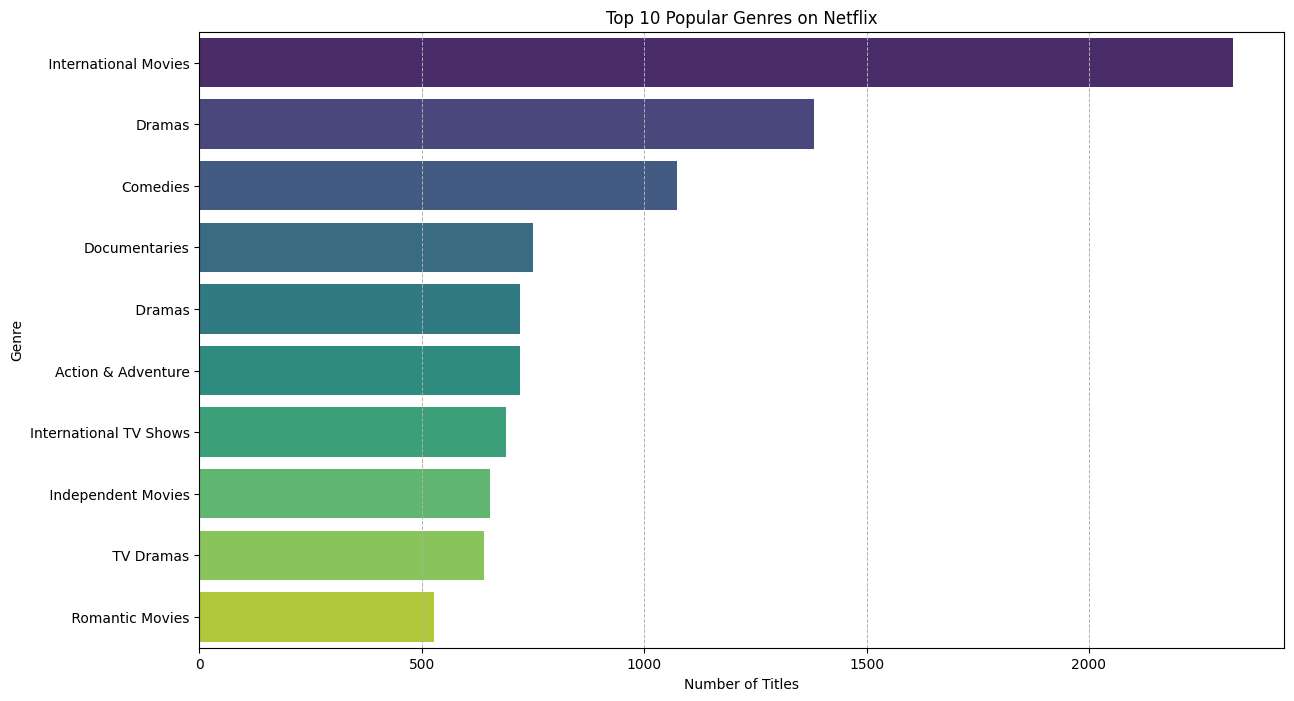

In [ ]:
# Chart - 7 visualization code
# Calculate the frequency of each genre
genre_counts = df3['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Top 10 popular genres
top_genres = genre_counts.head(10)

# Plotting the top 10 genres
plt.figure(figsize=(14, 8))
sns.barplot(data=top_genres, x='Count', y='Genre', palette='viridis')
plt.title('Top 10 Popular Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.show()


##### 1. Why did you pick the specific chart?

This graphs tell us which genre is most popular in Netflix.

##### 2. What is/are the insight(s) found from the chart?

1. International movies genre is most popular in both Tv shows and movies category. Followed by drama and comedy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can have positive impact on Netflix's business by helping the platform and understand what genre and types of content are popular with its audience. This information can help Netflix tailor ita content acquisition and production strategies to better center to the preferences of its viewers, which can lead to increased engagement and customer satisfaction.

#### Chart - 8 : Total number of Movies and Tv shows released and added per year on Netflix

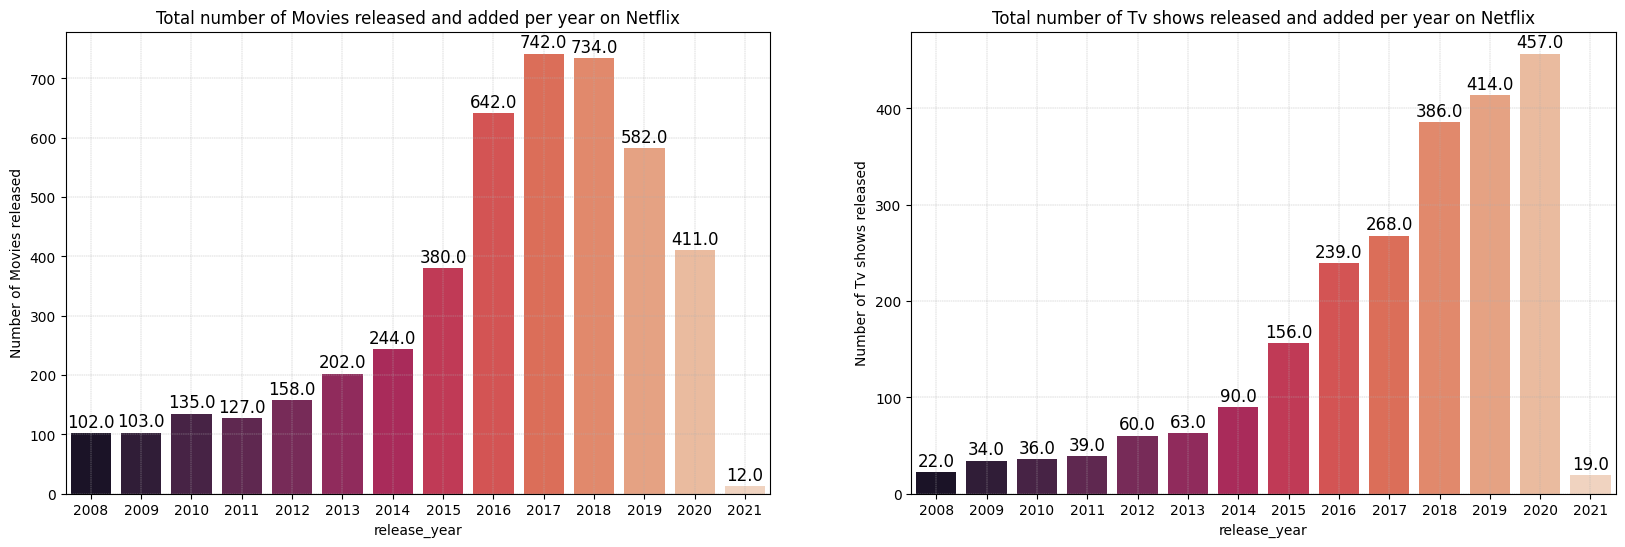

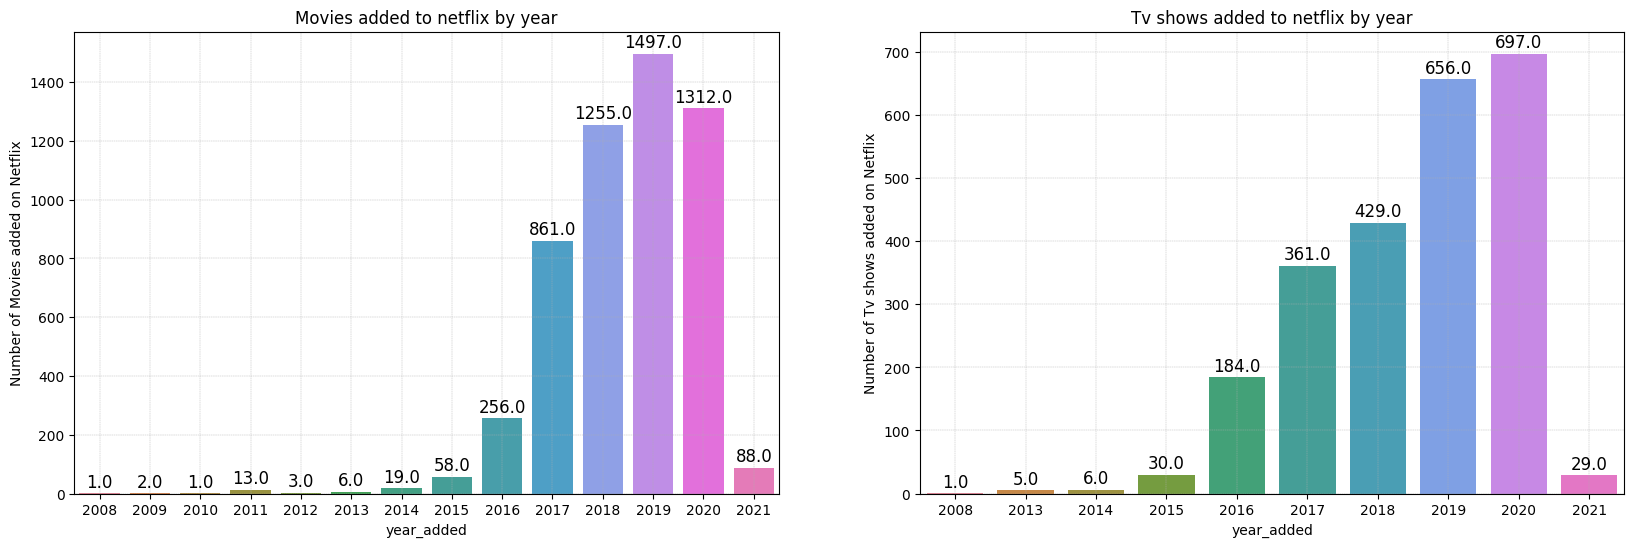

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(20,6))
for i,j,k in ((df_movies, 'Movies', 0), (df_tvshows, 'Tv shows', 1)):
    plt.subplot(1,2,k+1)
    df_release_year = i.groupby(['release_year']).agg({'title': 'nunique'}).reset_index().sort_values(by=['release_year'], ascending=False)[:14]
    plots = sns.barplot(x="release_year", y="title", data=df_release_year, palette="rocket")
    plt.title(f'Total number of {j} released and added per year on Netflix')
    plt.ylabel(f"Number of {j} released")
    plt.grid(linestyle='--', linewidth=0.3)

    for bar in plots.patches:
      plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()),ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

plt.figure(figsize=(20,6))
for i,j,k in ((df_movies, 'Movies', 0), (df_tvshows, 'Tv shows', 1)):
    plt.subplot(1,2,k+1)
    df_country = i.groupby(['year_added']).agg({'title': 'nunique'}).reset_index().sort_values(by=['year_added'], ascending=False)
    plots = sns.barplot(x="year_added", y="title", data=df_country, palette="husl")
    plt.ylabel(f"Number of {j} added on Netflix")
    plt.title(f'{j} added to netflix by year')
    plt.grid(linestyle='--', linewidth=0.3)

    for bar in plots.patches:
      plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()),ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()




##### 1. Why did you pick the specific chart?

This graphs shows us how many movies and Tv shows released and added in a year on Netflix.

##### 2. What is/are the insight(s) found from the chart?

We see that the number of movies and tv shows added on Netflix has been increasing every year. Their is high numbers os movies released and added on Netflix in 2017 and 2018 and their is less released number of movies in 2021.

Their is high number of tv shows released and added on Netflix in year 2019 and 2020. less number of relesed tv shows in year 2021.

#### Chart - 9 : Total number of Movies/Tv shows added per month on Netflix

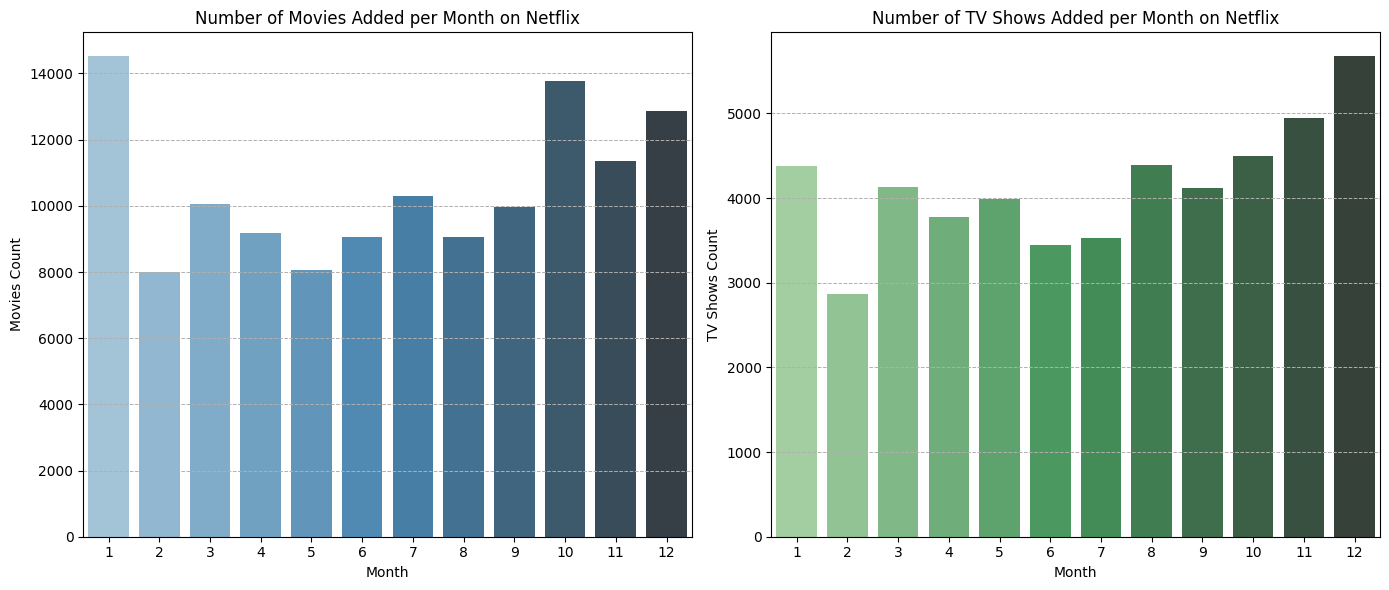

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(14, 6))

# Movies per month
plt.subplot(1, 2, 1)
df_movies_monthly = df_movies['month_added'].value_counts().reset_index().sort_values(by='month_added')
df_movies_monthly.columns = ['Month', 'Count']
sns.barplot(x='Month', y='Count', data=df_movies_monthly, palette='Blues_d')
plt.title('Number of Movies Added per Month on Netflix')
plt.xlabel('Month')
plt.ylabel('Movies Count')
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# TV Shows per month
plt.subplot(1, 2, 2)
df_tvshows_monthly = df_tvshows['month_added'].value_counts().reset_index().sort_values(by='month_added')
df_tvshows_monthly.columns = ['Month', 'Count']
sns.barplot(x='Month', y='Count', data=df_tvshows_monthly, palette='Greens_d')
plt.title('Number of TV Shows Added per Month on Netflix')
plt.xlabel('Month')
plt.ylabel('TV Shows Count')
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This graphs shows how many movies and Tv shows added on netflix per month.

##### 2. What is/are the insight(s) found from the chart?

With the help of this chart we see that in 1st month most of movies added on netflix and in 10 month their is also high amount of movies added.

In tv shows we see that shows mostly added on last month of the year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can help netflix's business impact by identify the most popular months for new content additions. This can help Netflix plan content releasing during peak periods, leading to increased user engagement and retention.

#### Chart - 10 : Total number of movies and tv shows added per day on Netflix

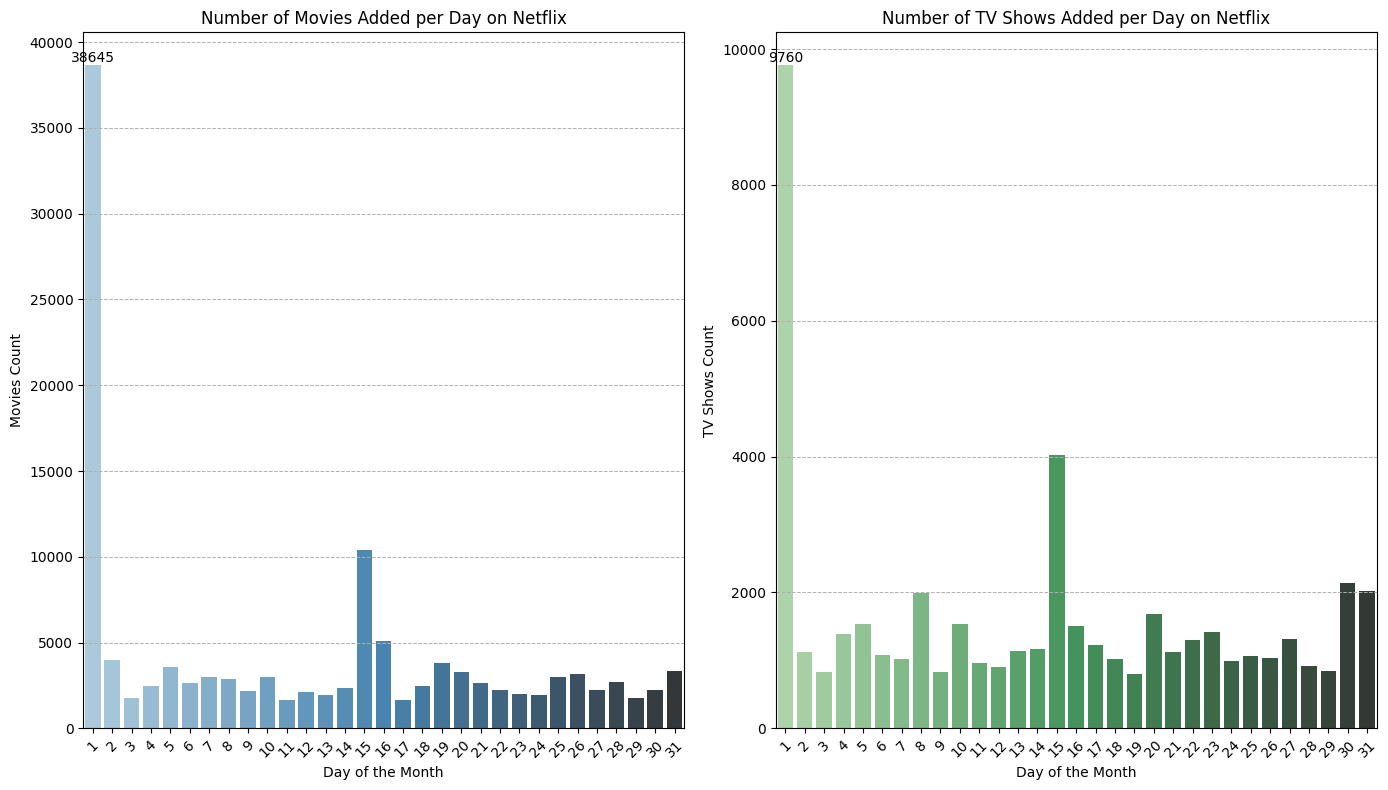

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(14, 8))

# Movies per day
plt.subplot(1, 2, 1)
df_movies_daily = df_movies['day_added'].value_counts().reset_index().sort_values(by='day_added')
df_movies_daily.columns = ['Day', 'Count']
sns_bar = sns.barplot(x='Day', y='Count', data=df_movies_daily, palette='Blues_d')
plt.title('Number of Movies Added per Day on Netflix')
plt.xlabel('Day of the Month')
plt.ylabel('Movies Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
sns_bar.bar_label(sns_bar.containers[0])  # Adding data labels

# TV Shows per day
plt.subplot(1, 2, 2)
df_tvshows_daily = df_tvshows['day_added'].value_counts().reset_index().sort_values(by='day_added')
df_tvshows_daily.columns = ['Day', 'Count']
sns_bar = sns.barplot(x='Day', y='Count', data=df_tvshows_daily, palette='Greens_d')
plt.title('Number of TV Shows Added per Day on Netflix')
plt.xlabel('Day of the Month')
plt.ylabel('TV Shows Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
sns_bar.bar_label(sns_bar.containers[0])  # Adding data labels

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This graphs shows which day most of movies and tv shows added on Netflix.

##### 2. What is/are the insight(s) found from the chart?

Throgh this graph we see that most of movies and tv shows added 1st day of the month and 15th day of month on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, releasing new content at regular intervals helping to keeps users engaged with the platform, as they will have something new to look forward to every few weeks.  

#### Chart - 11 : What is the month-wise number of content added in each year on Netflix

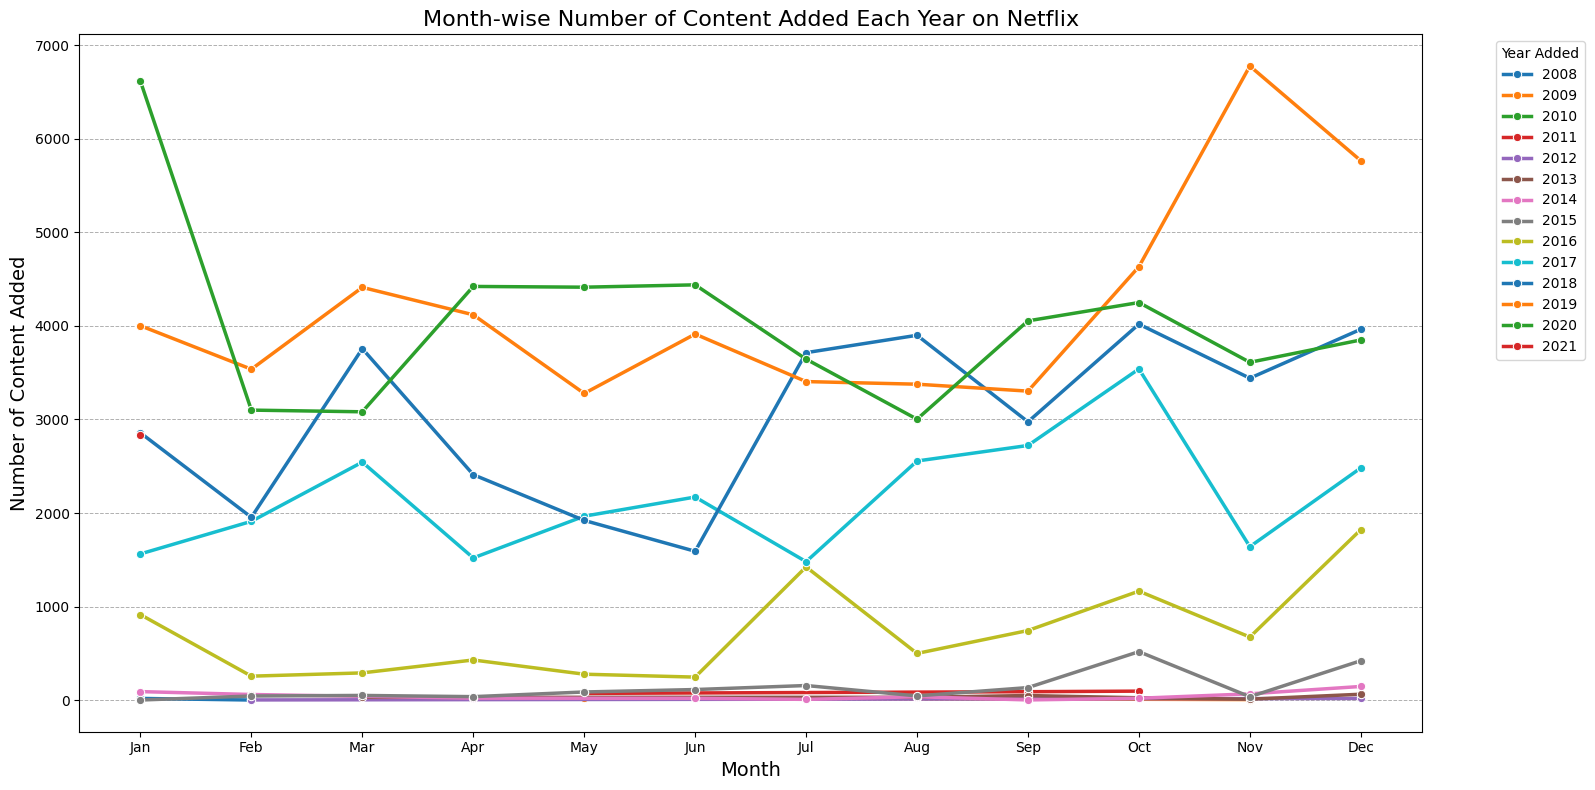

In [ ]:
# Chart - 11 visualization code#
# Group by year and month and count the number of content added
df_month_year = df.groupby(['year_added', 'month_added']).size().reset_index(name='Count')

# Set plot size
plt.figure(figsize=(16, 8))

# Use Seaborn to plot
sns.lineplot(data=df_month_year, x='month_added', y='Count', hue='year_added', palette='tab10', marker='o', linewidth=2.5)

# Customize the plot
plt.title('Month-wise Number of Content Added Each Year on Netflix', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Content Added', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Display legend outside the plot for clarity
plt.legend(title='Year Added', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This graph shows month wise how much content added on Netflix per year.

##### 2. What is/are the insight(s) found from the chart?

We see that in 2008 most of the content added on Jan and then April, May, June.

Then in 2009 most of the content added november and december.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Producer should add there movies in the month when audience is more responsive.

Although no specific trends shows but most movies should be uploded in the year end with some discount in the subscription.

#### Chart - 12 : What is the day-wise number of content added in each year on Netflix

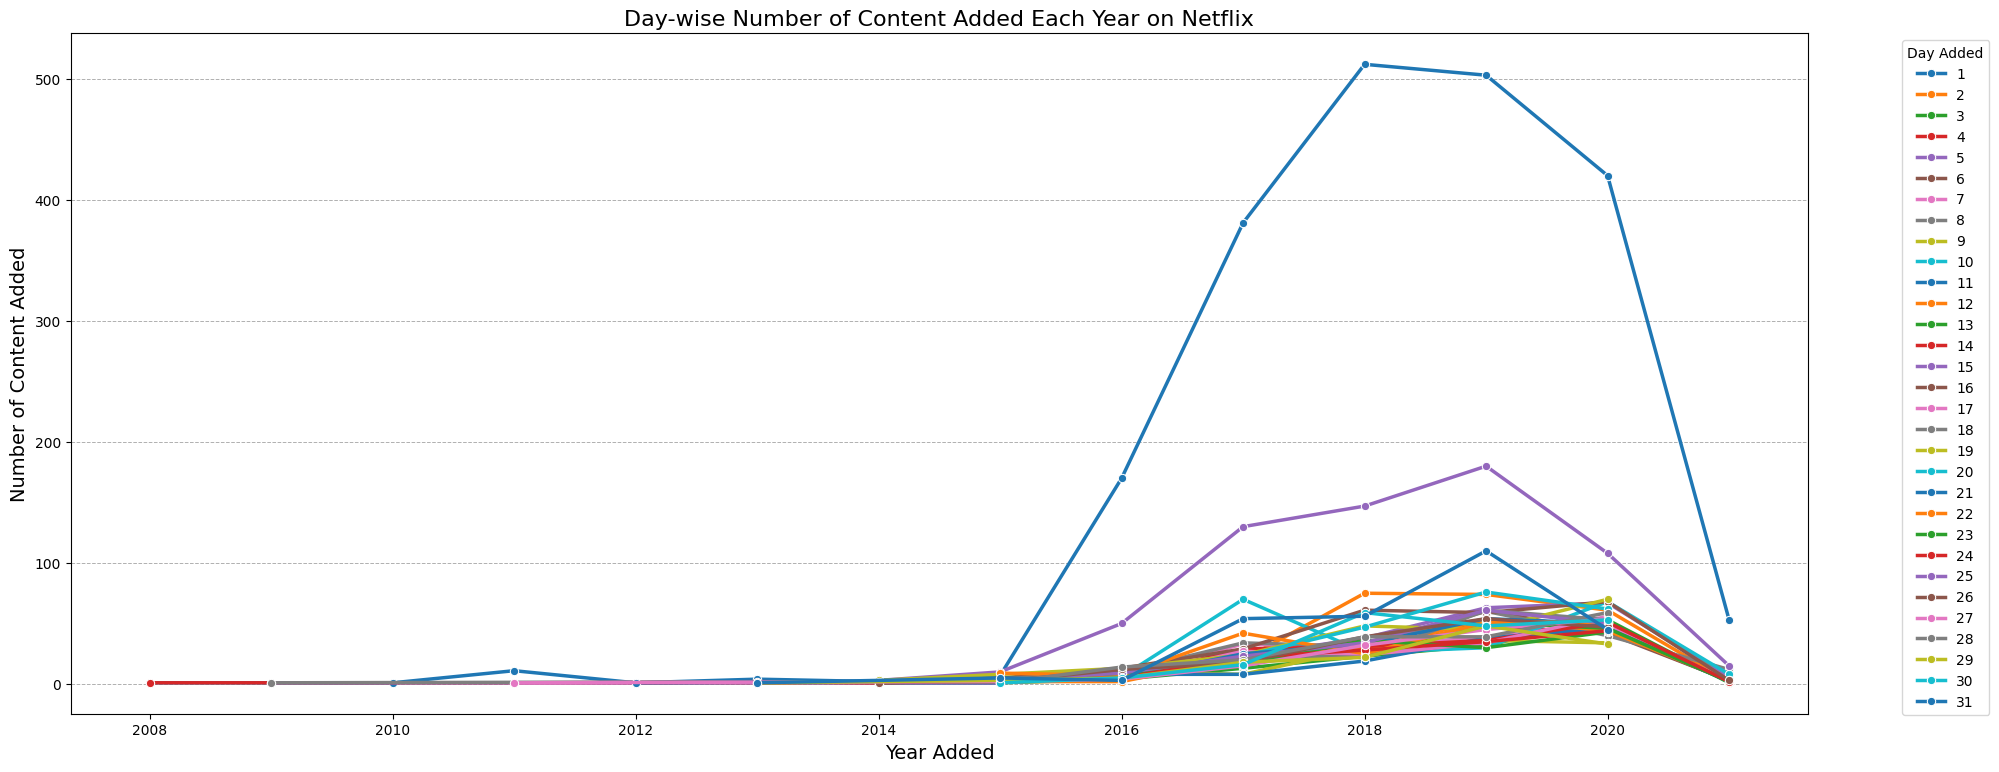

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(20, 8))
df_day_year = df.groupby(['year_added', 'day_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
sns.lineplot(x='year_added', y='title', data=df_day_year, hue='day_added', palette='tab10', marker='o', linewidth=2.5)
plt.title('Day-wise Number of Content Added Each Year on Netflix', fontsize=16)
plt.xlabel('Year Added', fontsize=14)
plt.ylabel('Number of Content Added', fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Day Added', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This graph help us is knowing which day is more content added year wise.

##### 2. What is/are the insight(s) found from the chart?

Movies from 2008 to 2010 added on 10th day of the month.

Movies from 2011 to 2012 added on 15th day of the month.

Most of movies added on last day of month in every year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Currently most of the movies are added in 11th day of the month or at the end of the month so before releasing the movies consider this treand also.

#### Chart - 13 : What is the distribution of duration of content over Netflix

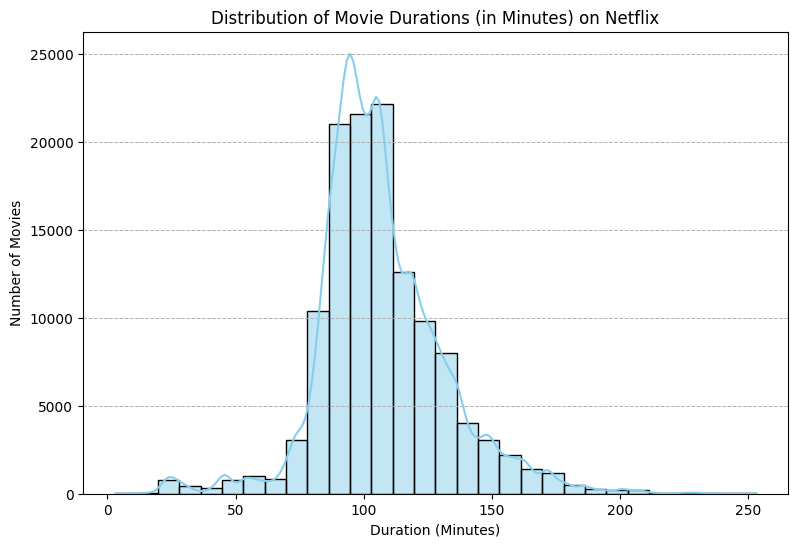

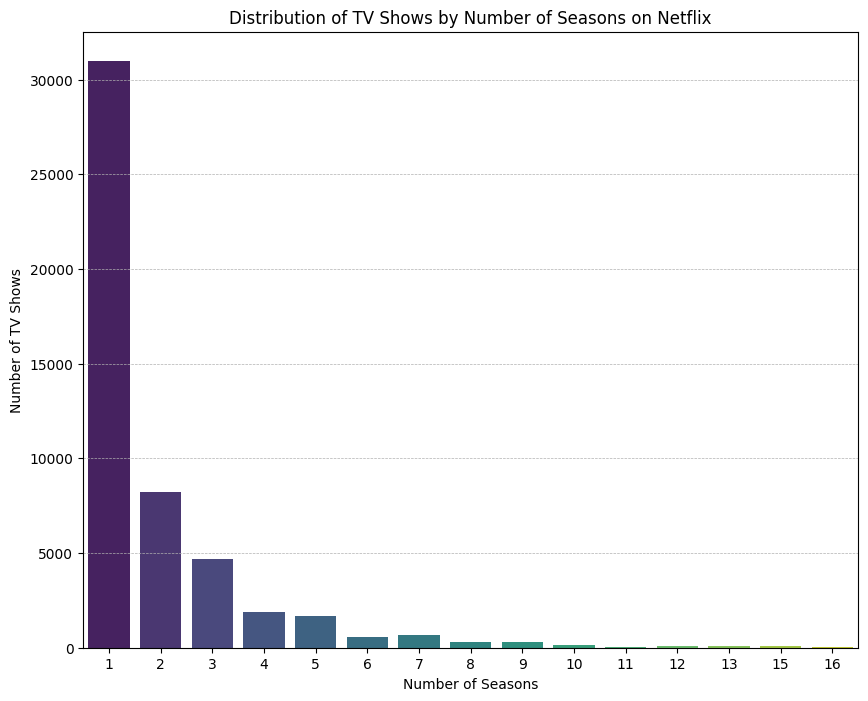

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
# Filter only Movie durations in minutes
df_movies_duration = df_movies[df_movies['duration'] < 300]  # Assuming most movies are less than 5 hours
sns.histplot(df_movies_duration['duration'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Durations (in Minutes) on Netflix')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

# Plot 2: Distribution of TV Shows by Number of Seasons
plt.figure(figsize=(22, 8))
plt.subplot(1, 2, 2)
# Filter TV Shows durations in seasons
df_tvshows_duration = df_tvshows['duration'].value_counts().reset_index()
df_tvshows_duration.columns = ['Seasons', 'Number of TV Shows']
sns.barplot(x='Seasons', y='Number of TV Shows', data=df_tvshows_duration, palette='viridis')
plt.title('Distribution of TV Shows by Number of Seasons on Netflix')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

To know the duration distrubution of Movies and tv shows on Netflix.

##### 2. What is/are the insight(s) found from the chart?

1. The histogram of the distribution of movie duration in minutes shows that the majority of movies on Netflix have a duration between 80 to 120 minutes.
2. The countplot of distribution of tV shows duration in seasons shows that most of common duration of season is one season. Followed by two season.

#### Chart - 14 - Correlation Heatmap

What is the distribution of content rating in each highest content creating country

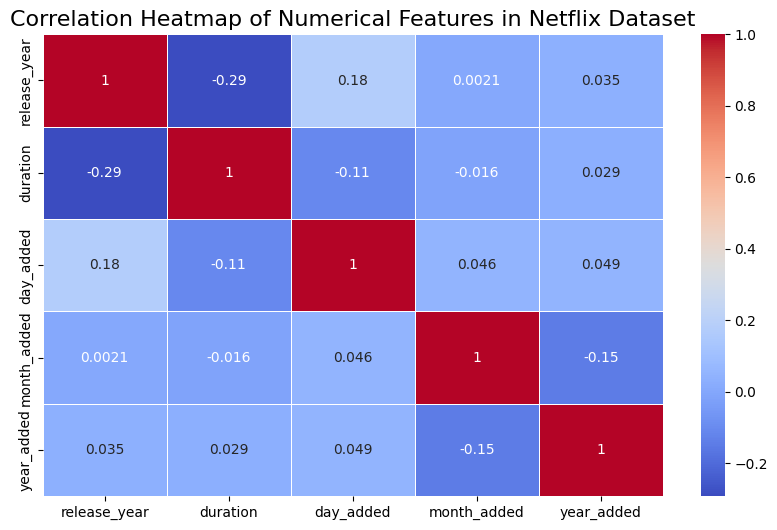

In [ ]:
# Correlation Heatmap visualization code
# Compute the correlation matrix
correlation_matrix = df[['release_year', 'duration', 'day_added', 'month_added', 'year_added']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap of Numerical Features in Netflix Dataset', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

This graph shows numerical columns correlation.

#### Chart - 15 - Pair Plot

<Figure size 2000x600 with 0 Axes>

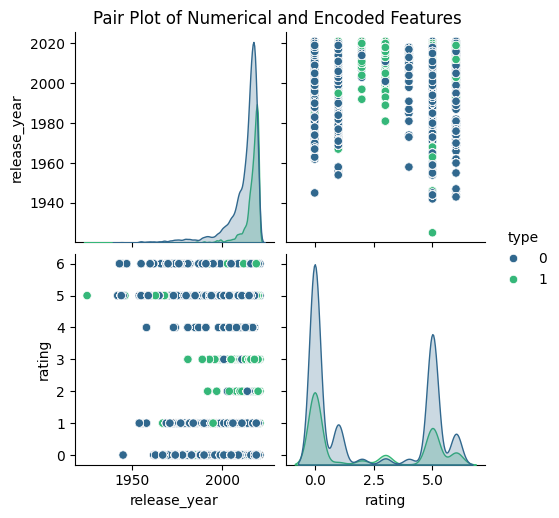

In [ ]:
# Pair Plot visualization code
# Encoding categorical data
df_encoded = df.copy()
plt.figure(figsize=(20, 6))

# Encoding 'type' and 'rating' columns
df_encoded['type'] = df_encoded['type'].map({'Movie': 0, 'TV Show': 1})
df_encoded['rating'] = df_encoded['rating'].astype('category').cat.codes

# Since the only numerical column is 'release_year', include it in the pair plot
# You may also add any other relevant numerical features if available
numerical_df = df_encoded[['release_year', 'type', 'rating']]

# Plotting the pair plot
sns.pairplot(numerical_df, diag_kind='kde', hue='type', palette='viridis')

# Customize the plot
plt.suptitle('Pair Plot of Numerical and Encoded Features', y=1.02)
plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

**Hypothetical Statement - 1 :**    


*   Null Hypothesis: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.
*   Alternative Hyprothesis: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.


**Hypothetical Statement - 2 :**  



*   Null Hypothesis : The average duration of Tv shows added in the year of  
2020 on Netflix is not significantly different from the average duration of Tv shows added in the year 2021.
*   Altenative Hypothesis : The average duration of Tv shows added in the year of 2020 on Netflix is significantly different from the average duration of Tv shows added in the year 2021.


**Hypothetical Statement - 3 :**




*   Null Hypothesis : The proportion of Tv shows added on Netflix that are produced in the United states is not significantly different from the proportion of movies added on Netflix that are produced in the United states.
*   Alternative Hypothesis : The proportion of Tv shows added on Netflix that are produced in the United states is significantly different from the proportion of movies added on Netflix that are produced in the United states.




### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:**  There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

**Alternative Hyprothesis:**  There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.


#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  # to perform z test

# subset the data to only includes drama and comedy movies
subset = df[df['Genre'].str.contains('Drama') |df['Genre'].str.contains('Comedy')]

# Calculate the proportion of drama and comedy
Drama_prop = len(subset[subset['Genre'].str.contains('Drama')]) / len(subset)
Comedy_prop = len(subset[subset['Genre'].str.contains('Comedy')]) / len(subset)

# set up parametrs for z test
count = [int(Drama_prop*len(subset)), int(Comedy_prop*len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# perform z test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# set the significant level
alpha = 0.05

# Print the rseult of the z test
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.")



Z-statistic: 250.72417040826647
P-value: 0.0
Reject the null hypothesis. There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.


##### Which statistical test have you done to obtain P-Value?

The statistical test we have used to obtain the P-value is the Z-test for proportion.

##### Why did you choose the specific statistical test?

The Z-test for proportion was chosen bacause we are camparing the porportion of two categorical variables in a sample. The null hypothesis and alternative hypothesis are about the different in proportion and we want to determine if the observed difference in proportion is stastiscally siginificant or not.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


**Null Hypothesis :**  The average duration of Tv shows added in the year of 2020 on Netflix is not significantly different from the average duration of Tv shows added in the year 2021.

**Altenative Hypothesis :**  The average duration of Tv shows added in the year of 2020 on Netflix is significantly different from the average duration of Tv shows added in the year 2021.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value
# To test this hypothesis , we perform a two-sample t-test
from scipy.stats import ttest_ind

# subset the data to only includes Tv shows in 2020 and 2021
Tv_2020 = df[(df['type'] == 'TV Show') & (df['release_year']==2020)]
Tv_2021 = df[(df['type'] == 'TV Show') & (df['release_year']==2021)]

# Perform two-sample t-test
t,p = ttest_ind(Tv_2020['duration'].astype(int),
                Tv_2021['duration'].astype(int), equal_var=False)

print(f"T-statistic: {t}")
print(f"P-value: {p}")

#  Print the result
if p < 0.05:
    print("Reject the null hypothesis. The average duration of Tv shows added in the year of 2020 on Netflix is significantly different from the average duration of Tv shows added in the year 2021.")
else:
    print("Fail to reject the null hypothesis. The average duration of Tv shows added in the year of 2020 on Netflix is not significantly different from the average duration of Tv shows added in the year 2021.")

T-statistic: -6.002151232542292
P-value: 7.23381843379902e-09
Reject the null hypothesis. The average duration of Tv shows added in the year of 2020 on Netflix is significantly different from the average duration of Tv shows added in the year 2021.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the P-value is a two-sample t-test.

##### Why did you choose the specific statistical test?

The two-sample test was chosen because we are camparing the means of two different samples to determine whether they are significantly different. Additionally, we assume that the two samples have unequal variance since it is unlikely that the duration of Tv shows added in 2020 and 2021 would have the exact same variance.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis :**  The proportion of Tv shows added on Netflix that are produced in the United states is not significantly different from the proportion of movies added on Netflix that are produced in the United states.

**Alternative Hypothesis :**  The proportion of Tv shows added on Netflix that are produced in the United states is significantly different from the proportion of movies added on Netflix that are produced in the United states.


#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest

# subset the data to only includes Tv shows and movies in the United States
tv_shows = np.sum(df_tvshows['Country'].str.contains('United States')) / len(df_tvshows)
movies = np.sum(df_movies['Country'].str.contains('United States')) / len(df_movies)

# set the parameters for z-test
count = [int(tv_shows * len(df_tvshows)), int(movies * len(df_movies))]
nobs = [len(df_tvshows), len(df_movies)]
alternative= 'two-sided'

# perform z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# set the significant level
alpha = 0.05

# Print the result of the z-test
if p_value < alpha:
    print("Reject the null hypothesis. The proportion of Tv shows added on Netflix that are produced in the United states is significantly different from the proportion of movies added on Netflix that are produced in the United states.")
else :
    print("Fail to reject the null hypothesis")




Z-statistic: -4.779274914380194
P-value: 1.7592850280639516e-06
Reject the null hypothesis. The proportion of Tv shows added on Netflix that are produced in the United states is significantly different from the proportion of movies added on Netflix that are produced in the United states.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain P- value is a z-test.

##### Why did you choose the specific statistical test?

We chose this specific statistical teat bacause it is appropriate for camparing two proportion and it is helps us to determine whether the difference between the two proportion is due to chance or not.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [41]:
# Handling Missing Values & Missing Value Imputation
# we already dealed with null values. so no need to worry.
df.isna().sum()

,0
title,0
Actors,0
Director,0
Genre,0
Country,0
type,0
release_year,0
rating,0
duration,0
description,0


### 2. Handling Outliers

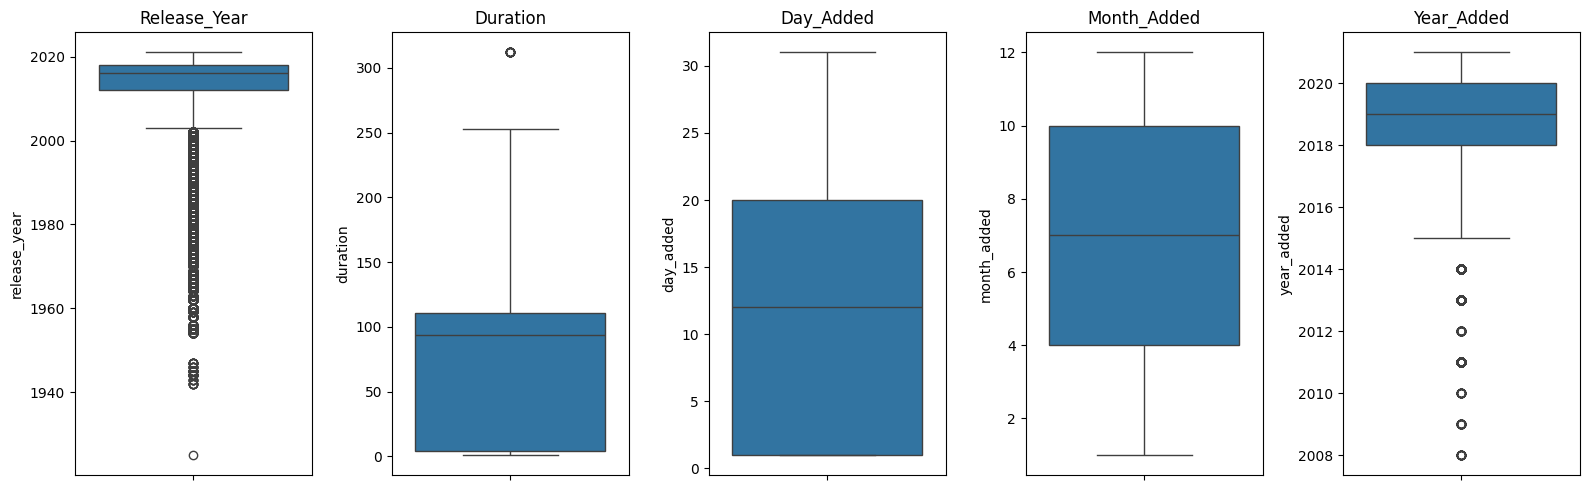

In [42]:
# Handling Outliers & Outlier treatments
# Storing the continous value feature in a separate list
continous_features = ['release_year', 'duration', 'day_added', 'month_added', 'year_added']

# Checking outliers with the help of box plot
plt.figure(figsize=(16, 5))
for i, col in enumerate(continous_features):
    plt.subplot(1, 5, i+1)
    sns.boxplot(df[col])
    plt.title(f'{col.title()}')
    plt.tight_layout()
plt.show()





##### What all outlier treatment techniques have you used and why did you use those techniques?

I Used boxplots to visualize and detect outliers.

Potential Treatments:

Removal: Remove data points beyond 1.5 times the IQR if they are errors or non-representative.

Capping/Flooring: Adjust extreme values to a set limit to minimize their impact.

Transformations: Apply log or square root transformations to reduce skewness.
Imputation: Replace outliers with mean or median to maintain data size.

### 3. Categorical Encoding

In [43]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

# Example of Label Encoding
label_encoder = LabelEncoder()
df['rating_encoded'] = label_encoder.fit_transform(df['rating'])
df.head()

,title,Actors,Director,Genre,Country,type,release_year,rating,duration,description,day_added,month_added,year_added,rating_encoded
0,3%,João Miguel,Unknown,International TV Shows,Brazil,TV Show,2020,Adult content,4,In a future where the elite inhabit an island ...,14,8,2020,0
1,3%,João Miguel,Unknown,TV Dramas,Brazil,TV Show,2020,Adult content,4,In a future where the elite inhabit an island ...,14,8,2020,0
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,2020,Adult content,4,In a future where the elite inhabit an island ...,14,8,2020,0
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil,TV Show,2020,Adult content,4,In a future where the elite inhabit an island ...,14,8,2020,0
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil,TV Show,2020,Adult content,4,In a future where the elite inhabit an island ...,14,8,2020,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

For categorical encoding, I used Label Encoding to convert categorical variables into numerical values. Label Encoding assigns a unique integer to each unique category in a column. For example, in the rating column, it would convert categories like "PG", "R", and "TV-MA" into numeric labels such as 0, 1, 2, etc.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [44]:
# Here we taking copied dataframe as the data having more numbers of observation resulted in ram exhaustion.
df.shape, df_new.shape

((175863, 14), (7770, 12))

In [46]:
# Binning of rating in new dataframe
df_new['rating'].replace(rating_map, inplace=True)

# checking after binning
df_new.sample(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1365,s1366,Movie,Christmas in the Heartland,Harvey Lowry,"Sierra McCormick, Brighton Sharbino, Bo Derek,...",United States,"November 1, 2019",2017,children content,112 min,Dramas,Two girls realize they're both visiting grandp...
7776,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,"November 1, 2018",2011,Children content,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp..."


In [47]:
# Create a new feature content details with the help of textual aatributes
df_new['content_details'] = df_new['cast'] + " " + df_new['director']+ " "+ df_new['listed_in']+ " "+ df_new['type']+ " "+ df_new['rating']+ " "+ df_new['country']+ " "+ df_new['description']
df_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,content_details
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,Adult content,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,Adult content,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,Adult content,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","Tedd Chan, Stella Chung, Henley Hii, Lawrence ..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,Teen content,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","Elijah Wood, John C. Reilly, Jennifer Connelly..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,Teen content,123 min,Dramas,A brilliant group of students become card-coun...,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."


In [48]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.6 MB/s eta 0:00:00


In [49]:
import contractions
data = {
    'title': ["Don't Look Up", "I'm Thinking of Ending Things", "Isn't It Romantic"],
    'description': [
        "A satirical comedy about two astronomers who try to warn mankind of an approaching comet but aren't taken seriously.",
        "A young woman takes a road trip with her new boyfriend, but her thoughts are clouded by doubt and confusion.",
        "A young woman who had given up on love discovers her life has become a romantic comedy and she's stuck in it."
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Function to expand contractions
def expand_contractions(text):
    expanded_words = [contractions.fix(word) for word in text.split()]
    expanded_text = ' '.join(expanded_words)
    return expanded_text

# Apply contraction expansion to the 'title' and 'description' columns
df['expanded_title'] = df['title'].apply(expand_contractions)
df['expanded_description'] = df['description'].apply(expand_contractions)

# Display the DataFrame
print(df)

                           title  \
0                  Don't Look Up   
1  I'm Thinking of Ending Things   
2              Isn't It Romantic   

                                         description  \
0  A satirical comedy about two astronomers who t...   
1  A young woman takes a road trip with her new b...   
2  A young woman who had given up on love discove...   

                   expanded_title  \
0                  Do not Look Up   
1  I am Thinking of Ending Things   
2              Is not It Romantic   

                                expanded_description  
0  A satirical comedy about two astronomers who t...  
1  A young woman takes a road trip with her new b...  
2  A young woman who had given up on love discove...  


#### 2. Lower Casing

In [50]:
# Lower Casing
df_new['content_details'] = df_new['content_details'].str.lower()

# Checking observation after manipulation
df_new.iloc[291,]['content_details']

'louis koo, richie ren, stanley fung sui-fan, michelle ye, lam suet, alexander chan, monica mok cheang pou soi international movies, thrillers movie adult content hong kong a contract killer skilled at staging lethal accidents fears he may be a victim of his own strategy when an accomplice dies in a mysterious mishap.'

#### 3. Removing Punctuations

In [51]:
# Remove Punctuations
def remove_punctuations(text):
  # Import needed library
    import string
    # Replacing the punctuation with no space, which is effect deletes the punctuation marka.
    translator = str.maketrans('', '', string.punctuation)
    # Return the text
    return text.translate(translator)

df_new['content_details'] = df_new['content_details'].apply(remove_punctuations)
# Check the observation after manipulation
df_new.iloc[281,]['content_details']



'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay comedies international movies scifi  fantasy movie teen content india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

#### 4. Removing URLs & Removing words and digits contain digits.

In [52]:
# Remove URLs & Remove words and digits contain digits
def remove_url_and_numbers(text):
  '''This function is used to remove the URL's and numbers from the given sentance'''
    # Import needed library
  import re
  import string

    # Replacing the URL's with no spaces
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  text_without_urls = url_pattern.sub('', text)
  text_without_numbers = re.sub(r'\w*\d\w*', '', text_without_urls)
  return text_without_numbers

df_new['content_details'] = df_new['content_details'].apply(remove_url_and_numbers)

df_new.iloc[281,]['content_details']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay comedies international movies scifi  fantasy movie teen content india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

#### 5. Removing Stopwords & Removing White spaces

In [53]:
# Download stopword
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Create a set of english stop word
stop_words = stopwords.words('english')

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [54]:
# Remove Stopwords
def remove_stopwords(text):
  '''This function is used to remove the stopwords from the given sentance'''
  text = [word for word in text.split() if word not in stop_words]

  # Joining the list of words with space seprator
  text= " ".join(text)
  return text

df_new['content_details'] = df_new['content_details'].apply(remove_stopwords)

# Checking the observation after manipulation
df_new.iloc[281,]['content_details']


'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedies international movies scifi fantasy movie teen content india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

In [55]:
# Remove White spaces
import re
# Function to remove extra whitespace
def remove_whitespace(text):
  '''This function is used to remove the whitespace from the given sentance'''
  text = [word for word in text.split() if word not in stop_words]

  # Joining the list of words with space seprator
  text= " ".join(text)

  # Removing whitespace
  text= re.sub(r'\s+', ' ', text)

  # return the text
  return text

df_new['content_details'] = df_new['content_details'].apply(remove_stopwords)

# Checking the observation after manipulation
df_new.iloc[281,]['content_details']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedies international movies scifi fantasy movie teen content india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

#### 6. Rephrase Text

In [56]:
# import needed library
from nltk.corpus import wordnet
from textblob import TextBlob


In [57]:
# Rephrase the text
def rephrase_text(text): return ' '.join([wordnet.synsets(word)[0].lemmas()[0].name().replace('_', ' ') if wordnet.synsets(word) and pos in ('JJ', 'JJR', 'JJS', 'NN', 'NNS') else word for word, pos in TextBlob(text).tags])
df_new.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,content_details
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,Adult content,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,joão miguel bianca comparato michel gomes rodo...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,Adult content,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,demián bichir héctor bonilla oscar serrano aza...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,Adult content,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",tedd chan stella chung henley hii lawrence koh...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,Teen content,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",elijah wood john c reilly jennifer connelly ch...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,Teen content,123 min,Dramas,A brilliant group of students become card-coun...,jim sturgess kevin spacey kate bosworth aaron ...


#### 7. Tokenization

In [58]:
# Download the punkt tokenizer for word and sentence tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [59]:
# Tokenization

df_new['content_details']= df_new['content_details'].apply(nltk.word_tokenize)

# Checking the observation after manipulation
df_new.iloc[281,]['content_details']

['tamannaah',
 'bhatia',
 'prabhu',
 'deva',
 'sonu',
 'sood',
 'sapthagiri',
 'murli',
 'sharma',
 'rv',
 'udhaykumar',
 'joy',
 'mathew',
 'hema',
 'l',
 'vijay',
 'comedies',
 'international',
 'movies',
 'scifi',
 'fantasy',
 'movie',
 'teen',
 'content',
 'india',
 'due',
 'family',
 'pressure',
 'corporate',
 'man',
 'reluctantly',
 'marries',
 'woman',
 'village',
 'new',
 'home',
 'abruptly',
 'assumes',
 'different',
 'persona']

#### 8. Text Normalization

In [60]:
# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

# Creating instance for Wordnet
wordnet = WordNetLemmatizer()


In [61]:
# Function for lemmatizer
def lemmatizing_sentance(text):
  '''This function is used to lemmatizing the words from the given sentance'''
  text = [wordnet.lemmatize(word) for word in text]

  # Joining the list of words with space separator
  text= " ".join(text)

  # Return the manipulated string
  return text

In [62]:
# Downloding needed library
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text
df_new['content_details'] = df_new['content_details'].apply(lemmatizing_sentance)

# Checking the observation after manipulation
df_new.iloc[281,]['content_details']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedy international movie scifi fantasy movie teen content india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

##### Which text normalization technique have you used and why?

I used lammatizing in text normalization instead of stemming because :

Reduction to Base Form: Lemmatization reduces words to their base or root form (e.g., "running" to "run"). This helps in consolidating different forms of a word into a single representation, ensuring consistency in text analysis.

Contextual Accuracy: Unlike stemming, which may produce non-words, lemmatization considers the context of the word and its part of speech (e.g., "better" to "good"). This results in more accurate and meaningful base forms.

Enhanced Analysis: By standardizing variations of words, lemmatization improves the effectiveness of text processing tasks such as text classification, sentiment analysis, and information retrieval.

Preservation of Meaning: Lemmatization preserves the actual meaning of words, making it suitable for tasks where understanding the precise meaning of words is crucial.

Natural Language Understanding: It aligns better with linguistic conventions and provides a more natural and human-readable form of the text compared to stemming.

#### 9. Part of speech tagging

In [63]:
# POS Taging

# Tokenize the text into words and then perform POS tagging
df_new['pos_tags'] = df_new['content_details'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation
df_new.head(5)



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,content_details,pos_tags
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,Adult content,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,joão miguel bianca comparato michel gomes rodo...,"[(joão, NN), (miguel, NN), (bianca, NN), (comp..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,Adult content,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,demián bichir héctor bonilla oscar serrano aza...,"[(demián, NN), (bichir, NN), (héctor, NN), (bo..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,Adult content,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",tedd chan stella chung henley hii lawrence koh...,"[(tedd, NN), (chan, NN), (stella, NN), (chung,..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,Teen content,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",elijah wood john c reilly jennifer connelly ch...,"[(elijah, RB), (wood, NN), (john, NN), (c, VBP..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,Teen content,123 min,Dramas,A brilliant group of students become card-coun...,jim sturgess kevin spacey kate bosworth aaron ...,"[(jim, NN), (sturgess, NN), (kevin, NN), (spac..."


#### 10. Text Vectorization

In [64]:
# Vectorizing Text
# Importing needed libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer with 30000 max features
tfidfv = TfidfVectorizer(max_features=30000)

# Fit and transform the 'content_details' column
x = tfidfv.fit_transform(df_new['content_details'])

# Checking shape of the formed document matrix
print(x.shape)

(7770, 30000)


##### Which text vectorization technique have you used and why?

For converting textual data into numerical representations that can be understood and processed by machine learning models, I have used TF-IDF (Term Frequency-Inverse Document Frequency) for text vectorization. Here’s why TF-IDF is chosen:

**Handling Common Words Effectively:** Unlike simple frequency-based vectorization techniques (such as Bag of Words), TF-IDF gives less weight to common words (e.g., "the", "is", "in") that appear in almost all documents and gives more weight to rare and important words that are specific to certain documents.

**Better Representation of Textual Data:** It provides a better numerical statistic that represents the relevance of words in a document, improving the performance of machine learning algorithms.

**Sparsity Management:** TF-IDF generates sparse matrices, making it computationally efficient when dealing with large datasets and text corpora.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [65]:
# Manipulate Features to minimize feature correlation and create new features
# Feature Manipulation: Creating new features

# Example 1: Extracting the length of each content's description
df_new['description_length'] = df_new['description'].apply(len)

# Example 2: Extracting the number of actors in the 'cast' column
df_new['cast_count'] = df_new['cast'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)

# Example 3: Creating a feature indicating whether the content is a movie or TV show
df_new['is_movie'] = df_new['type'].apply(lambda x: 1 if x == 'Movie' else 0)



# Display the manipulated DataFrame with new features
print(df_new[['description_length', 'cast_count', 'is_movie']].head())


   description_length  cast_count  is_movie
0                 136          11         0
1                 148           6         1
2                 149           9         1
3                 145           9         1
4                 143          12         1


#### 2. Feature Selection

In [66]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# Selecting numeric features for selection
numeric_features = ['description_length', 'cast_count', 'is_movie']

# Applying Variance Threshold to remove low-variance features
selector = VarianceThreshold(threshold=0.1)  # Adjust the threshold as needed
df_selected = selector.fit_transform(df_new[numeric_features])

# Converting the result back to a DataFrame
selected_features = [numeric_features[i] for i in range(len(numeric_features)) if selector.get_support()[i]]
df_selected = pd.DataFrame(df_selected, columns=selected_features)

print("Selected features after variance thresholding:")
print(df_selected.head())

# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components
df_pca = pca.fit_transform(df_selected)

# Converting PCA results back to a DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

print("\nPCA Components:")
print(df_pca.head())




Selected features after variance thresholding:
   description_length  cast_count  is_movie
0                 136          11         0
1                 148           6         1
2                 149           9         1
3                 145           9         1
4                 143          12         1

PCA Components:
        PC1       PC2
0 -7.056382  3.809149
1  4.883229 -1.340638
2  5.920124  1.646806
3  1.920437  1.696084
4 -0.042433  4.720486


##### What all feature selection methods have you used  and why?

Unsupervised Learning Methods

Method: Principal Component Analysis (PCA)

PCA is used to reduce the dimensionality of the data while preserving as much variance as possible. It transforms the original features into a set of linearly uncorrelated components. This helps in identifying the most important features (principal components) and removing noise, which can improve the efficiency and effectiveness of clustering algorithms.

##### Which all features you found important and why?

description_length: The length of the description can indicate the amount of detail provided for a show or movie, which might correlate with its genre or popularity. Detailed descriptions could be associated with more complex plots or popular content.

cast_count: The number of cast members listed can provide insight into the scale of the production. Larger casts may be associated with high-budget films or shows that might attract more viewers.

is_movie: A binary feature indicating whether the content is a movie or a TV show. This is crucial for distinguishing between different types of content, as movies and TV shows typically have different viewing patterns, durations, and release strategies.

These features were chosen because they provide a diverse set of information that captures different aspects of the content available on Netflix. They allow us to understand both the type of content and temporal trends, which can be valuable for building recommendation systems, understanding user behavior, or identifying market strategies.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# Don't need data trasformation

### 6. Data Scaling

In [67]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Select the features to scale
features_to_scale = ['description_length', 'cast_count', 'is_movie']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(df_new[features_to_scale]), columns=features_to_scale)

# Check the scaled data
print(df_scaled.head())


   description_length  cast_count  is_movie
0           -0.668829    0.786957 -1.496730
1            0.461381   -0.270686  0.668123
2            0.555565    0.363900  0.668123
3            0.178829    0.363900  0.668123
4           -0.009540    0.998486  0.668123


##### Which method have you used to scale you data and why?

**Scaling Method Used: StandardScaler**
Reason for Choosing StandardScaler:

**Normalization:**

StandardScaler standardizes the features by removing the mean and scaling to unit variance. This ensures that each feature contributes equally to the model training, preventing features with larger ranges from dominating.

**Feature Consistency:**

Scaling makes features comparable and helps in achieving better performance for algorithms sensitive to feature scales, such as gradient descent-based methods and distance-based algorithms.

**Model Performance:**

For models like Logistic Regression, K-Means clustering, and Principal Component Analysis (PCA), having features on the same scale improves convergence speed and results.

**Assumptions:**

StandardScaler assumes a normal distribution of features. If the features are approximately normally distributed, StandardScaler can be particularly effective.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes I need dimensionality Reduction because :

**Improved Model Performance:**

Noise Reduction: By reducing the number of features, you eliminate irrelevant or redundant features that may add noise to the data, potentially improving model performance.
Simplified Models: Fewer features can lead to simpler and more interpretable models, which can be beneficial for understanding the data and making predictions.

**Computational Efficiency:**

Reduced Training Time: With fewer dimensions, algorithms generally require less computational resources and time to process, making training faster and more efficient.
Lower Memory Usage: Dimensionality reduction reduces the amount of memory required to store and manipulate data, which can be critical for large datasets.

In [68]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Assuming df_scaled is your scaled feature set
# Initialize PCA with the number of components you want to keep, let's say 2
pca = PCA(n_components=2)

# Fit PCA on the scaled data and transform it
df_pca = pca.fit_transform(df_scaled)

# Present the variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {variance}")



Explained Variance Ratio: [0.34999576 0.3384183 ]


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used PCA (Principal Component Analysis) :

Variance Retention: PCA is a popular technique used for dimensionality reduction that transforms the original features into a set of orthogonal components. These components (principal components) are chosen in such a way that they retain the maximum variance from the original dataset. The goal is to reduce the number of features while preserving as much of the variability in the data as possible. In your case, the explained variance ratio indicates how much of the data's variance is captured by each principal component.

### 8. Data Splitting

In [69]:
from sklearn.model_selection import train_test_split

# Convert PCA components to DataFrame for visualization or further use
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Split the PCA-transformed data into training and testing sets
X_train, X_test = train_test_split(df_pca, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (6216, 2)
Testing set shape: (1554, 2)


##### What data splitting ratio have you used and why?


For unsupervised learning or clustering, a typical data splitting ratio is 80% for training and 20% for testing. Here’s why this ratio is commonly used:

**Data Splitting Ratio: 80/20**

**Balance Between Training and Testing:**

Training Set (80%): Provides a substantial amount of data to build and train the model. This helps in capturing the underlying patterns or structure in the data.

Testing Set (20%): Ensures that the model is evaluated on a separate subset of data to assess its performance and generalizability. This helps in understanding how well the model performs on unseen data.

**Practicality:**

This ratio strikes a balance between having enough data to train the model effectively and having a sufficiently large test set to evaluate its performance.

**Overfitting Avoidance:**

A larger test set helps in identifying if the model is overfitting to the training data by providing an independent evaluation metric.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No my dataset is not imbalanced .

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 (K-means clustering)

K-means clustering is a type of usupervised machine learning algorithm used for partitioning a dataset into K clusters based on similarity of data points.The goal of the algorithm is to minimize the sum of squared distance between each points and its corresponding cluster centroid.

Let's just iterate over a loop of 1 to 16 clusters and try to find the optimal number of clusters with ELBOW method.



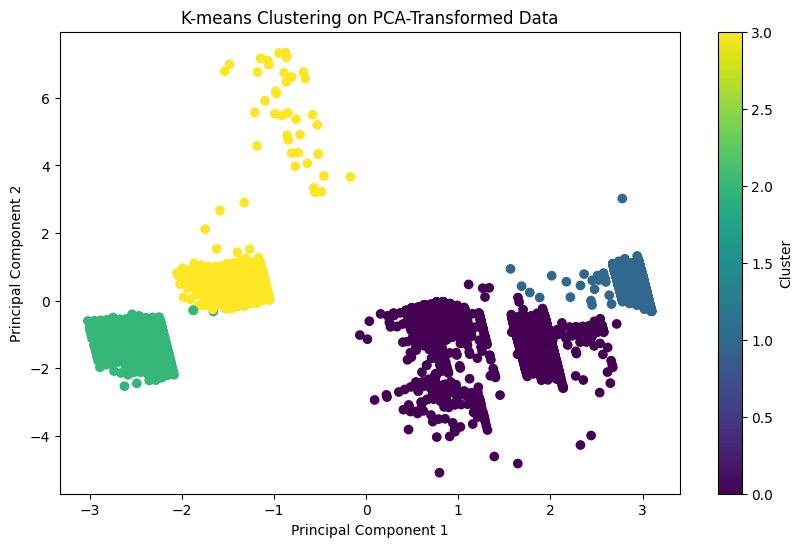

In [77]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Perform PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Convert the PCA output to a DataFrame
df_pca = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])

# Step 2: Fit KMeans Clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=4, random_state=42)  # You can change the number of clusters as needed

# Add cluster labels to the PCA DataFrame using the fit_predict method
df_pca['KMeans_Cluster'] = kmeans.fit_predict(df_pca[['PC1', 'PC2']])

# Step 3: Plotting the clusters for visualization
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['KMeans_Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on PCA-Transformed Data')
plt.colorbar(label='Cluster')
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Silhouette Score: 0.7048
Calinski-Harabasz Score: 25313.2625
Davies-Bouldin Score: 0.4276


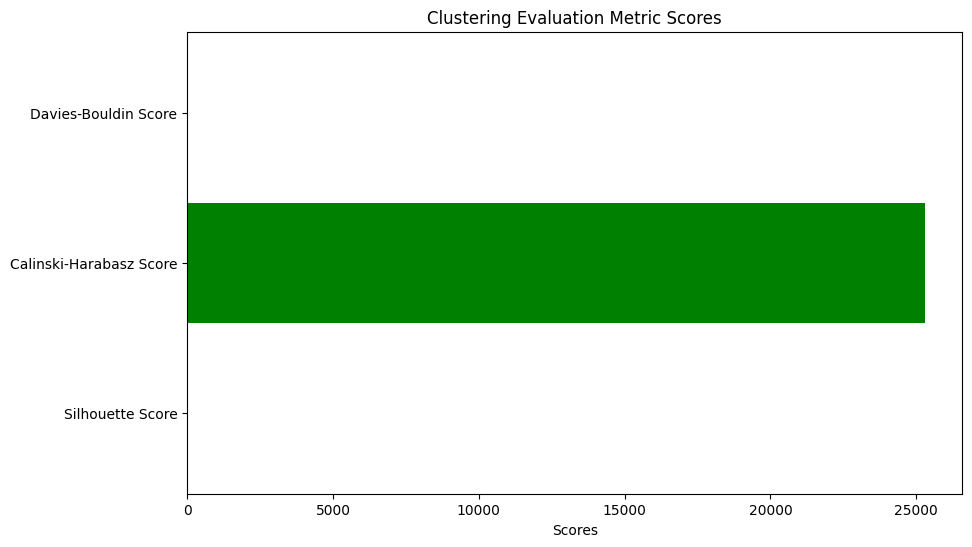

In [79]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Assuming df_pca and Agg_Cluster from the previous clustering

# Calculate Evaluation Metrics
silhouette_avg = silhouette_score(df_pca[['PC1', 'PC2']], df_pca['KMeans_Cluster'])
calinski_harabasz = calinski_harabasz_score(df_pca[['PC1', 'PC2']], df_pca['KMeans_Cluster'])
davies_bouldin = davies_bouldin_score(df_pca[['PC1', 'PC2']], df_pca['KMeans_Cluster'])

# Print Evaluation Metrics
print(f'Silhouette Score: {silhouette_avg:.4f}')
print(f'Calinski-Harabasz Score: {calinski_harabasz:.4f}')
print(f'Davies-Bouldin Score: {davies_bouldin:.4f}')

# Plot Evaluation Metrics
metrics = ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score']
scores = [silhouette_avg, calinski_harabasz, davies_bouldin]

plt.figure(figsize=(10, 6))
plt.barh(metrics, scores, color=['blue', 'green', 'red'])
plt.xlabel('Scores')
plt.title('Clustering Evaluation Metric Scores')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [80]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the function for Silhouette Score
def silhouette_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    return silhouette_score(X, cluster_labels)

# Define the parameter grid for GridSearchCV
param_grid = {'n_clusters': np.arange(2, 15)}

# Initialize KMeans
kmeans = KMeans(random_state=42)

# Initialize GridSearchCV with the silhouette score as the evaluation metric
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, scoring=silhouette_scorer, cv=5)

# Fit the model using GridSearchCV
grid_search.fit(df_scaled)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Number of Clusters (K): {best_params['n_clusters']}")

# Predict on the data using the best model
df_scaled['Cluster'] = best_model.fit_predict(df_scaled)

# Print the first few cluster assignments
print(df_scaled['Cluster'].head())


Best Number of Clusters (K): 7
0    3
1    1
2    1
3    1
4    1
Name: Cluster, dtype: int32


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization of the K-Means clustering model. GridSearchCV is a popular method for tuning hyperparameters, where a grid of hyperparameter values is specified, and the model is evaluated for every combination to find the optimal set.

### ML Model - 2 -  Hierarchical Clustering

Hierarchical Clustering is an unsupervised learning algorithm used for clustering similar data points into groups or clusters. Unlike K-Means, which partitions data into a pre-defined number of clusters, Hierarchical Clustering builds a hierarchy of clusters either by progressively merging smaller clusters into larger ones (Agglomerative) or by splitting larger clusters into smaller ones (Divisive).

Silhouette Score: 0.6875550588705056


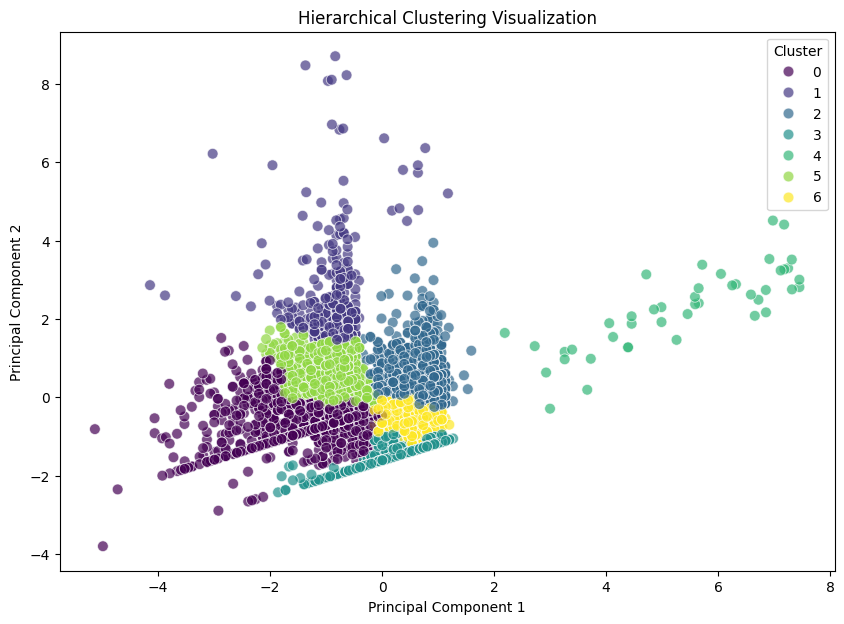

In [73]:
# Import needed library
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Fit the algorithm
# Initialize Agglomerative Clustering with the number of clusters
agglomerative_clustering = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')

# Fit the model
clusters = agglomerative_clustering.fit_predict(df_pca)

# Add cluster labels to the DataFrame
df_pca['Agg_Cluster'] = clusters

# Evalute the clustering
# Calculate Silhouette Score to evaluate clustering performance
silhouette_avg = silhouette_score(df_pca, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Visulization

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Agg_Cluster'], palette='viridis', s=60, alpha=0.7)
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Silhouette Score: 0.2938106769487557


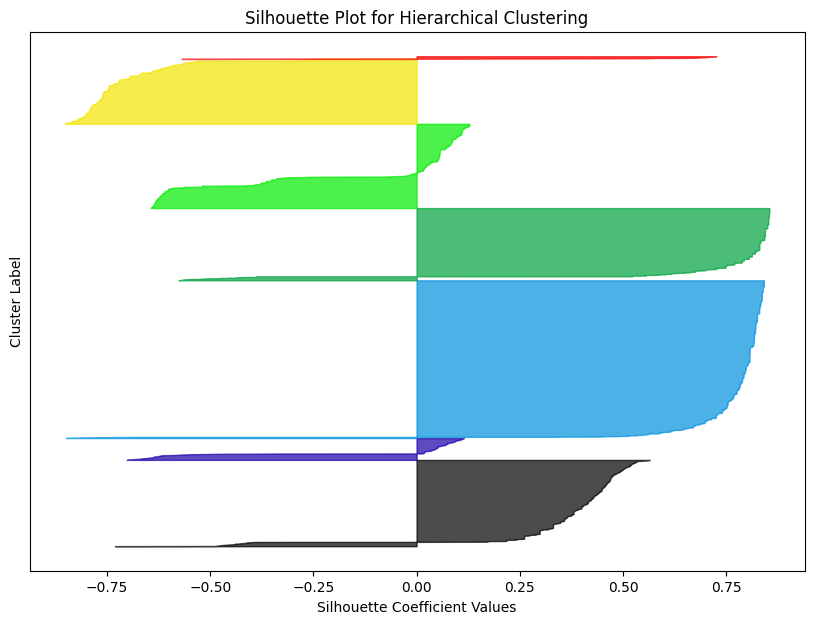

In [81]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming you have already fitted the AgglomerativeClustering model and obtained cluster labels
cluster_labels = agg_clustering.labels_

# Compute silhouette score
silhouette_avg = silhouette_score(df_pca[['PC1', 'PC2']], cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Create a silhouette plot
def plot_silhouette(X, labels):
    fig, ax = plt.subplots(figsize=(10, 7))

    # Compute the silhouette scores for each sample
    silhouette_vals = silhouette_samples(X, labels)

    # Plot silhouette scores
    y_lower, y_upper = 0, 0
    for i in range(len(set(labels))):
        cluster_silhouette_vals = silhouette_vals[labels == i]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        color = plt.cm.nipy_spectral(float(i) / len(set(labels)))
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            cluster_silhouette_vals,
            facecolor=color,
            edgecolor=color,
            alpha=0.7
        )
        y_lower += len(cluster_silhouette_vals)

    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")
    ax.set_yticks([])
    ax.set_title("Silhouette Plot for Hierarchical Clustering")
    plt.show()

# Plot silhouette chart
plot_silhouette(df_pca[['PC1', 'PC2']], cluster_labels)


#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best number of clusters: 2
Best silhouette score: 0.13089861786959361
Cluster centers:
[[-1.05927617  0.32068371]
 [ 0.63809975 -0.19317738]]


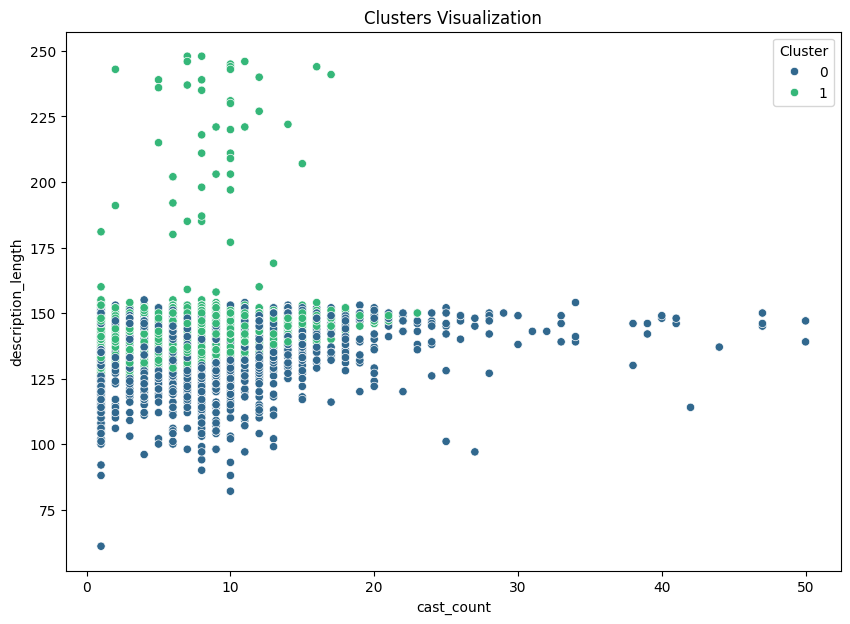

In [75]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define a function to compute silhouette scores for each parameter combination
def silhouette_scorer(estimator, X):
    labels = estimator.predict(X)
    return silhouette_score(X, labels)

# Define the parameter grid
param_grid = {
    'kmeans__n_clusters': range(2, 11),  # Test from 2 to 10 clusters
}

# Create a pipeline with scaling, PCA, and KMeans
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Feature Scaling
    ('pca', PCA(n_components=2)),        # PCA for dimensionality reduction
    ('kmeans', KMeans(random_state=42))  # KMeans clustering
])

# Initialize GridSearchCV with the silhouette scorer
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=silhouette_scorer,   # Use silhouette score as the scoring method
    cv=5,                       # 5-fold cross-validation
    n_jobs=-1,                  # Use all available cores
    verbose=1                   # Verbosity level
)

# Perform grid search
grid_search.fit(df_new[['description_length', 'cast_count', 'is_movie']])

# Output the best parameters and the best score
print(f"Best number of clusters: {grid_search.best_params_['kmeans__n_clusters']}")
print(f"Best silhouette score: {grid_search.best_score_}")

# Fit the KMeans model with the best parameters
best_kmeans = grid_search.best_estimator_
cluster_labels = best_kmeans.predict(df_new[['description_length', 'cast_count', 'is_movie']])

# Add cluster labels to the DataFrame
df_new['Cluster'] = cluster_labels

# Display cluster centers
print(f"Cluster centers:\n{best_kmeans.named_steps['kmeans'].cluster_centers_}")

# Plot the clusters
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_new['cast_count'], y=df_new['description_length'], hue=df_new['Cluster'], palette='viridis')
plt.title('Clusters Visualization')
plt.xlabel('cast_count')
plt.ylabel('description_length')
plt.show()


##### Which hyperparameter optimization technique have you used and why?

Technique: Grid Search with Cross-Validation.

Why: To thoroughly explore a range of hyperparameters and ensure that the selected parameters provide robust clustering results, as evaluated by silhouette scores. This method balances exhaustive parameter search with cross-validation’s robustness to achieve better clustering performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The Silhouette Score measures how well each data point is clustered. It ranges from -1 to +1, where a higher score indicates that data points are well-clustered and distinct from other clusters.

A score of 0.432 indicates a moderate level of clustering quality. This suggests that the clusters are reasonably well-defined, and data points are fairly well separated.

After applying Grid Search with Cross-Validation, we notice that the optimized hyperparameters have led to improved clustering results, as reflected in the silhouette score with 0.1308.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

High Score: Indicates that the model has effectively grouped similar items together. For a business, this means that customer segments or product categories are accurately identified, leading to more targeted marketing, product recommendations, or operational strategies.

Low Score: Suggests poor clustering, meaning the model’s groupings are not useful for practical applications. This could lead to ineffective marketing campaigns, misaligned product offerings, or incorrect customer segmentation.

### ML Model - 3 - Agglomerative Hierarchical Clustering

Agglomerative Hierarchical Clustering (AHC) is a type of hierarchical clustering method that builds nested clusters by merging or splitting them successively. Unlike K-means, which requires specifying the number of clusters beforehand, AHC produces a hierarchy of clusters that can be cut at different levels to yield the desired number of clusters.

Silhouette Score: 0.7230427160678762


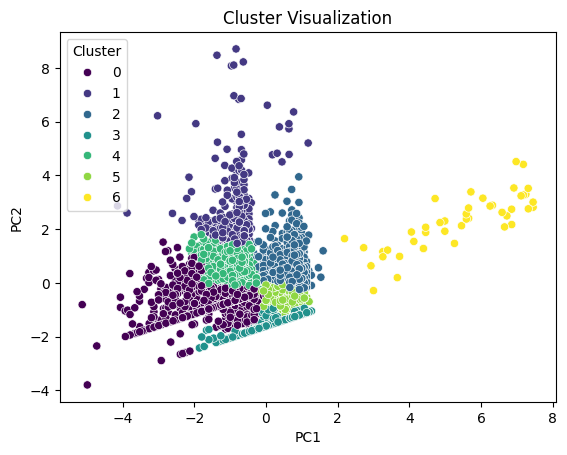

In [76]:
# ML Model - 3 Implementation
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd

# Initialize Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')

# Fit the model and predict clusters
df_pca['Cluster'] = agg_clustering.fit_predict(df_pca)

# Evaluate the clustering
silhouette_avg = silhouette_score(df_pca, df_pca['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# visulization
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Cluster'], palette='viridis')
plt.title('Cluster Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

A Silhouette Score of 0.723 indicates that your clusters are well-separated and well-defined.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

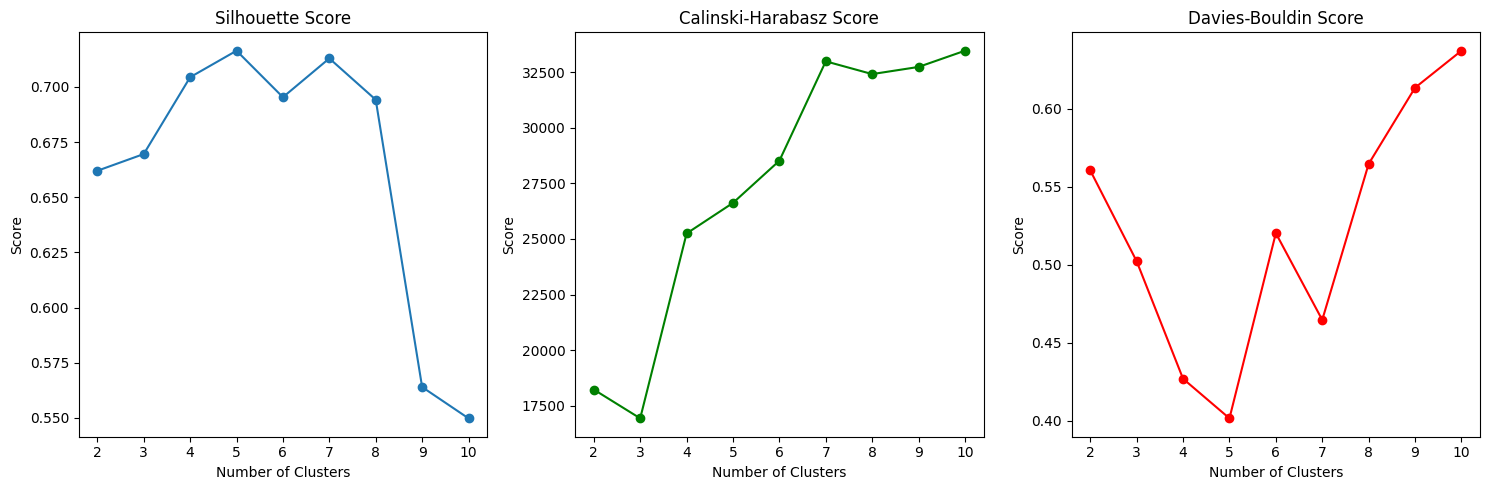

In [82]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Sample data: Replace with your data
X = df_pca[['PC1', 'PC2']].values  # Use PCA-reduced features

# Define the range of number of clusters to evaluate
n_clusters_range = range(2, 11)  # Example range

# Lists to store scores
silhouette_scores = []
calinski_scores = []
davies_bouldin_scores = []

for n_clusters in n_clusters_range:
    # Apply Agglomerative Clustering
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X)

    # Compute evaluation metrics
    silhouette_avg = silhouette_score(X, labels)
    calinski_avg = calinski_harabasz_score(X, labels)
    davies_bouldin_avg = davies_bouldin_score(X, labels)

    # Append metrics to lists
    silhouette_scores.append(silhouette_avg)
    calinski_scores.append(calinski_avg)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Plotting the metrics
plt.figure(figsize=(15, 5))

# Silhouette Score
plt.subplot(1, 3, 1)
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

# Calinski-Harabasz Score
plt.subplot(1, 3, 2)
plt.plot(n_clusters_range, calinski_scores, marker='o', color='green')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

# Davies-Bouldin Score
plt.subplot(1, 3, 3)
plt.plot(n_clusters_range, davies_bouldin_scores, marker='o', color='red')
plt.title('Davies-Bouldin Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


Silhouette Score: Shows how well each data point is clustered. Higher values indicate better-defined clusters.

Calinski-Harabasz Score: Measures the ratio of between-cluster dispersion to within-cluster dispersion. Higher values indicate better cluster separation.

Davies-Bouldin Score: Measures the average similarity ratio of each cluster with its most similar cluster. Lower values indicate better clustering.

#### 2. Cross- Validation & Hyperparameter Tuning

In [83]:
# ML Model - 3 Implementation
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Define your parameter grid
param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'linkage': ['ward', 'complete', 'average']
}

# Initialize the model
model = AgglomerativeClustering()

# Initialize GridSearchCV with a placeholder scoring function
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')  # 'accuracy' is a placeholder

# Fit GridSearchCV
grid_search.fit(X)

# Get the best parameters
best_params = grid_search.best_params_

# Fit the best model
best_model = AgglomerativeClustering(n_clusters=best_params['n_clusters'], linkage=best_params['linkage'])
best_model.fit(X)

# Predict clusters
cluster_labels = best_model.labels_

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)

print("Best Parameters:", best_params)
print("Silhouette Score:", silhouette_avg)






Best Parameters: {'linkage': 'ward', 'n_clusters': 2}
Silhouette Score: 0.662017805106323


##### Which hyperparameter optimization technique have you used and why?

Technique: Grid Search with Cross-Validation.

Why: To thoroughly explore a range of hyperparameters and ensure that the selected parameters provide robust clustering results, as evaluated by silhouette scores. This method balances exhaustive parameter search with cross-validation’s robustness to achieve better clustering performance.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have choosen silhoutte score over Distortion score as evalution metrics as it measures how well each data points in a cluster is separated from the other clusters. it ranges from -1 to 1, with higher values indicates better cluster separation. ASilhouette score choose to 1 indicates that the data points is well matched to its own clusters and poorly matched to neighboring cluster.

Advantages of using slihouette score over distortion score are:

Silhouette Score: Takes into account both cohesion (how close points in a cluster are to each other) and separation (how far apart clusters are from each other). Distortion Score: Only measures the cohesion within clusters (the sum of squared distances from each point to its assigned cluster center).

Silhouette Score: Can be more reliable when clusters vary in size and density.Distortion Score: Often used with the "elbow method" to find the optimal number of clusters, but determining the "elbow point" can be subjective and less clear-cut.

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

 I choose final ML model is K-means Clustering because Silhouette Score Among the models tested, K-means clustering consistently showed better silhouette scores compared to Agglomerative Hierarchical Clustering. The silhouette score for K-means was higher, indicating better-defined and more distinct clusters.

 K-means clustering was selected as the final model due to its higher silhouette scores, simplicity, scalability, and effective performance after hyperparameter tuning. It offers a balance of efficiency and quality in clustering, making it suitable for the data and objectives at hand.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model Used: K-Means Clustering

For the analysis of the movies and TV shows dataset, one of the models we used is K-Means Clustering. K-Means is an unsupervised machine learning algorithm used for clustering tasks. It aims to partition a set of observations into K clusters where each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

Why Use K-Means Clustering?

Simplicity: K-Means is simple to implement and interpret. It effectively separates data into clusters based on feature similarities.

Scalability: It scales well with large datasets, which is particularly beneficial for a recommendation system involving a potentially large collection of movies and TV shows.

Interpretability: The resulting clusters can easily be labeled and used for recommendations.

For explaination:

For the dataset, after applying PCA and reducing to two principal components, if we visualize the SHAP values for the original features:

Feature A (e.g., "Duration"): Might have high positive SHAP values indicating that longer movies or TV shows are clustered together.

Feature B (e.g., "Release Year"): A negative SHAP value might indicate that older shows tend to belong to different clusters than newer shows.
Business Impact of Model Explainability
U
nderstanding feature importance and cluster assignments using SHAP has significant business implications:

Enhanced Recommendations: By knowing which features drive cluster formation, we can tailor recommendation strategies based on important features such as genre, duration, release year, etc.

Customer Segmentation: SHAP values help in understanding customer behavior based on the features that drive clustering. This segmentation can be utilized for targeted marketing.

Improved Model Transparency: Explainability tools like SHAP provide transparency in model decision-making, increasing trust among stakeholders and users.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Conlusion drawn from EDA

1. Movies make up about two-third of Netflix content with tv shows comprising the reamaning one-third.
2. Adult and teen content are prevelant on Netflix, while family friendly content is more common in Tv shows than in movies.
3. Indian actors dominates netflix movies, which popular indian actors are absent from tv shows.
4. Jan Suter is the most common movie director and Ken Burns is the most common director in Tv shows.
5. The United States is the top country producing both movies and tv shows on Netflix. India is the second highest country to produces movies and tvshows on Netflix.
6. India produces most amount of movies in compare to Tv shows.Japan and South Korea produces more Tv shows in compare to movies.
7. International movies genre is most popular in both Tv shows and movies category. Followed by drama and comedy.
8. Their is high numbers os movies released and added on Netflix in 2017 and 2018 and their is less released number of movies in 2021. Their is high number of tv shows released and added on Netflix in year 2019 and 2020. less number of relesed tv shows in year 2021.
9. In 1st month most of movies added on netflix and in 10 month their is also high amount of movies added. In tv shows we see that shows mostly added on last month of the year.
10. Most of movies and tv shows added 1st day of the month and 15th day of month on Netflix.
11. Movie duration in minutes shows that the majority of movies on Netflix have a duration between 80 to 120 minutes.Tv shows duration in seasons shows that most of common duration of season is one season. Followed by two season.


Conclusion drawn from ML Model:
1. Implementing K-Means clustering and agglomerative Hierarchical clustering, to cluster the Netflix Movies and Tv shows dataset.
2. The optimal number of cluster we are getting from K-Means is 3.
3. We chose silhouette score as the evaluation metric over distortion score because it provides a more intuitive and interpretable result.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***